In [3]:
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns 


##  План работы

### Основная задача: Классификация оттока клиентов (Churn Prediction)

---

### Этапы работы:

1. **Разведочный анализ данных (EDA)**
   - Изучение структуры данных
   - Анализ распределений признаков
   - Выявление корреляций
   - Визуализация ключевых зависимостей

2. **Предобработка данных**
   - Обработка типов данных (TotalCharges → float)
   - Кодирование категориальных признаков
   - Масштабирование числовых признаков
   - Анализ дисбаланса классов

3. **Построение моделей классификации**
   - Разделение на train/test
   - Обучение базовых моделей
   - Подбор гиперпараметров
   - Сравнение моделей

4. **Оценка результатов**
   - Метрики качества 
   - Анализ важности признаков
   - Интерпретация результатов
   - Рекомендации для бизнеса

In [5]:
df = pandas.read_csv('data/raw/telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 📊 Описание датасета Telco Customer Churn

### 🎯 Цель исследования
**"Прогнозирование поведения клиентов для их удержания"**

Анализ всех релевантных данных о клиентах и разработка целенаправленных программ удержания клиентов (Customer Retention Programs).

---

### 📋 Общая информация
- **Источник:** IBM Sample Data Sets
- **Количество записей:** 7,043 клиента
- **Количество признаков:** 21 столбец
- **Объем памяти:** 1.1+ MB
- **Пропущенные значения:** Отсутствуют (все столбцы содержат 7043 записи)
- **Структура:** Каждая строка = один клиент, каждый столбец = атрибут клиента

---

### 🎯 Целевая переменная
- **Churn** (object) - **отток клиента за последний месяц** (Yes/No)
  - Показывает клиентов, которые ушли от оператора связи в течение последнего месяца
  - **Основная цель анализа:** предсказать вероятность оттока

---

### 👤 Демографические характеристики клиентов

| Столбец | Тип | Описание |
|---------|-----|----------|
| **customerID** | object | Уникальный идентификатор клиента |
| **gender** | object | Пол клиента (Male/Female) |
| **SeniorCitizen** | int64 | Возрастная категория: пожилой человек (1) или нет (0) |
| **Partner** | object | Наличие партнера/супруга (Yes/No) |
| **Dependents** | object | Наличие иждивенцев (Yes/No) |

---

### 📞 Услуги телефонной связи

| Столбец | Тип | Описание |
|---------|-----|----------|
| **PhoneService** | object | Подключена ли телефонная связь (Yes/No) |
| **MultipleLines** | object | Наличие нескольких телефонных линий (Yes/No/No phone service) |

---

### 🌐 Интернет-услуги и дополнительные сервисы

| Столбец | Тип | Описание |
|---------|-----|----------|
| **InternetService** | object | Тип интернет-провайдера (DSL/Fiber optic/No) |
| **OnlineSecurity** | object | Служба онлайн-безопасности (Yes/No/No internet service) |
| **OnlineBackup** | object | Онлайн-резервное копирование данных (Yes/No/No internet service) |
| **DeviceProtection** | object | Защита устройств (Yes/No/No internet service) |
| **TechSupport** | object | Техническая поддержка (Yes/No/No internet service) |
| **StreamingTV** | object | Потоковое телевидение (Yes/No/No internet service) |
| **StreamingMovies** | object | Потоковые фильмы (Yes/No/No internet service) |

---

### 💳 Информация об учетной записи клиента

| Столбец | Тип | Описание |
|---------|-----|----------|
| **tenure** | int64 | **Длительность обслуживания** - количество месяцев, в течение которых клиент пользуется услугами |
| **Contract** | object | Тип контракта (Month-to-month/One year/Two year) |
| **PaperlessBilling** | object | Безбумажный биллинг - электронные счета (Yes/No) |
| **PaymentMethod** | object | Способ оплаты (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)) |
| **MonthlyCharges** | float64 | Ежемесячная плата в долларах |
| **TotalCharges** | object | **Общая сумма платежей** за все время обслуживания (⚠️ хранится как object) |

---

### 🔍 Ключевые особенности датасета

#### Категории данных:
1. **Демографическая информация** - пол, возрастная группа, партнеры и иждивенцы
2. **Подписанные услуги** - телефон, интернет, стриминг, безопасность и техподдержка  
3. **Информация об аккаунте** - срок обслуживания, контракт, способ оплаты, суммы платежей
4. **Поведение клиента** - ушел ли клиент (Churn) за последний месяц

---

### ⚠️ Важные замечания для анализа

1. **TotalCharges** имеет тип `object` вместо `float64` - требуется преобразование в числовой формат
2. Многие категориальные признаки имеют значение **"No internet service"** или **"No phone service"** - это отдельная категория, а не пропуски
3. Датасет **не содержит пропущенных значений** (все 7043 записи полные)
4. **Дисбаланс классов** в целевой переменной Churn требует анализа

---

### 🎯 В контексте ML-задачи:
-  Положительный класс (Positive): Churn = "Yes" (клиент ушёл)
-  Отрицательный класс (Negative): Churn = "No" (клиент остался)
#### Метрики будут означать:

1. True Positive (TP): правильно предсказали, что клиент уйдёт
2. False Positive (FP): предсказали уход, но клиент остался (ложная тревога)
3. False Negative (FN): НЕ предсказали уход, но клиент ушёл (⚠️ самое плохое!)
4. True Negative (TN): правильно предсказали, что клиент останется

### 💡 Бизнес-задача
Разработать модель прогнозирования оттока клиентов (Churn Prediction), чтобы:
- Выявить клиентов с высоким риском ухода
- Понять факторы, влияющие на отток
- Создать целевые программы удержания клиентов
- Снизить потери от оттока клиентов

## 📊 1. Разведочный анализ данных (EDA)

### Анализ распределения признаков

Распределение целевой переменной Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Процентное соотношение:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


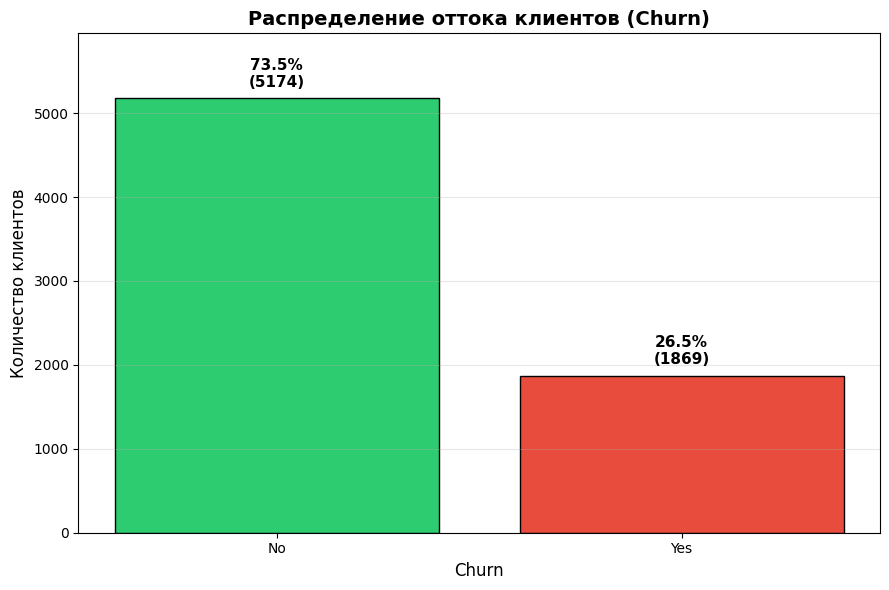

In [6]:
# Анализ целевой переменной Churn
print("Распределение целевой переменной Churn:")
print(df['Churn'].value_counts())
print(f"\nПроцентное соотношение:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Визуализация
plt.figure(figsize=(9, 6))
counts = df['Churn'].value_counts()
percentages = df['Churn'].value_counts(normalize=True) * 100

bars = plt.bar(counts.index, counts.values, color=['#2ecc71', '#e74c3c'], edgecolor='black')

# Добавление процентов на столбцы
for bar, count, pct in zip(bars, counts.values, percentages.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'{pct:.1f}%\n({count})', ha='center', va='bottom', 
            fontweight='bold', fontsize=11)

plt.title('Распределение оттока клиентов (Churn)', fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, max(counts.values) * 1.15)  
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

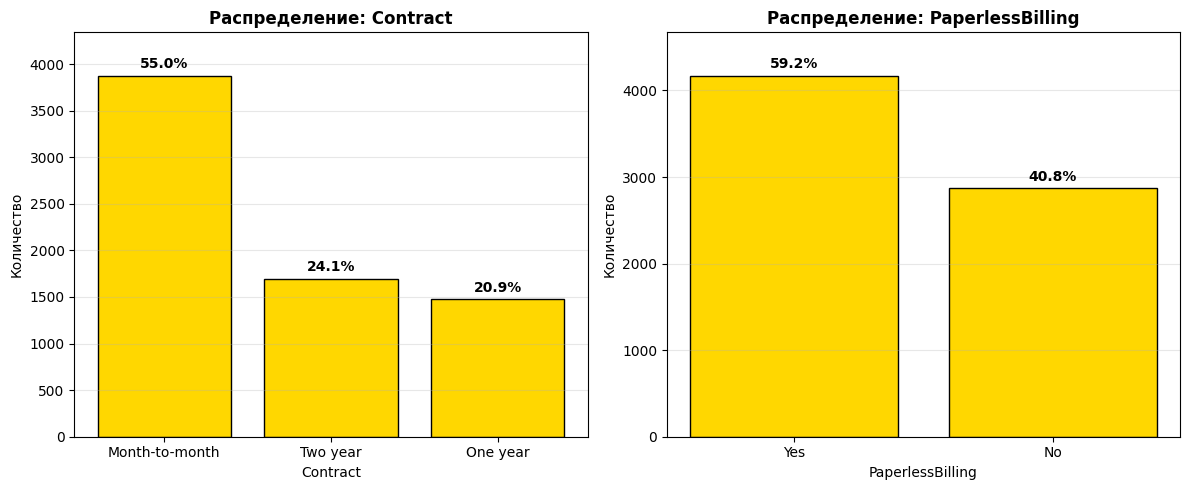

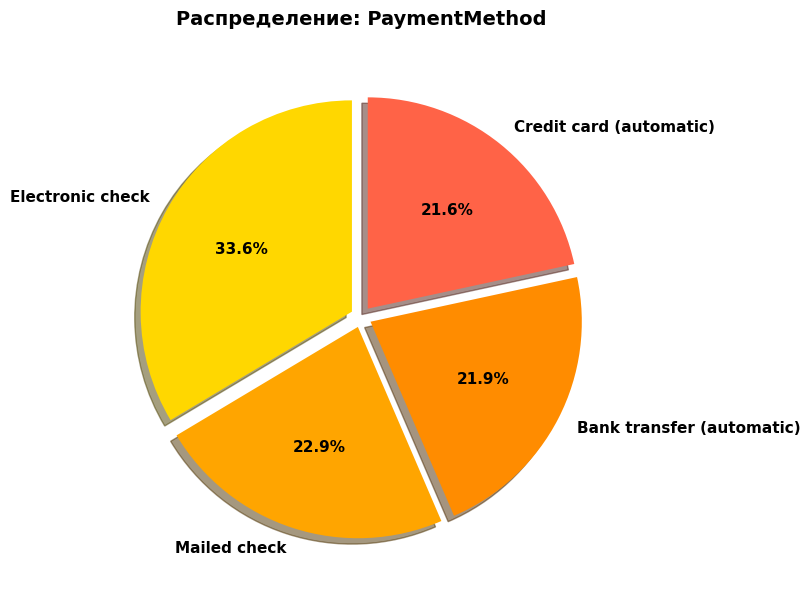


📊 Точные значения PaymentMethod:

  Electronic check: 2365 (33.58%)
  Mailed check: 1612 (22.89%)
  Bank transfer (automatic): 1544 (21.92%)
  Credit card (automatic): 1522 (21.61%)
--------------------------------------------------


In [7]:
# Платежная информация
payment_features = ['Contract', 'PaperlessBilling']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, feature in enumerate(payment_features):
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100
    
    bars = axes[i].bar(counts.index, counts.values, color='gold', edgecolor='black')
    
    # Добавление процентов на столбцы
    for bar, count, pct in zip(bars, counts.values, percentages.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 50,
                    f'{pct:.1f}%', ha='center', va='bottom', 
                    fontweight='bold', fontsize=10)
    
    axes[i].set_title(f'Распределение: {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Количество')
    axes[i].set_ylim(0, max(counts.values) * 1.12)  
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# PaymentMethod - круговая диаграмма
plt.figure(figsize=(8, 8))
counts = df['PaymentMethod'].value_counts()
colors = ['#FFD700', '#FFA500', '#FF8C00', '#FF6347']
explode = [0.05] * len(counts)

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors[:len(counts)], explode=explode, shadow=True,
        textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Распределение: PaymentMethod', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Точные значения
print("\n📊 Точные значения PaymentMethod:\n")
percentages = df['PaymentMethod'].value_counts(normalize=True) * 100
for val, count in counts.items():
    pct = percentages[val]
    print(f"  {val}: {count} ({pct:.2f}%)")
print("-" * 50)

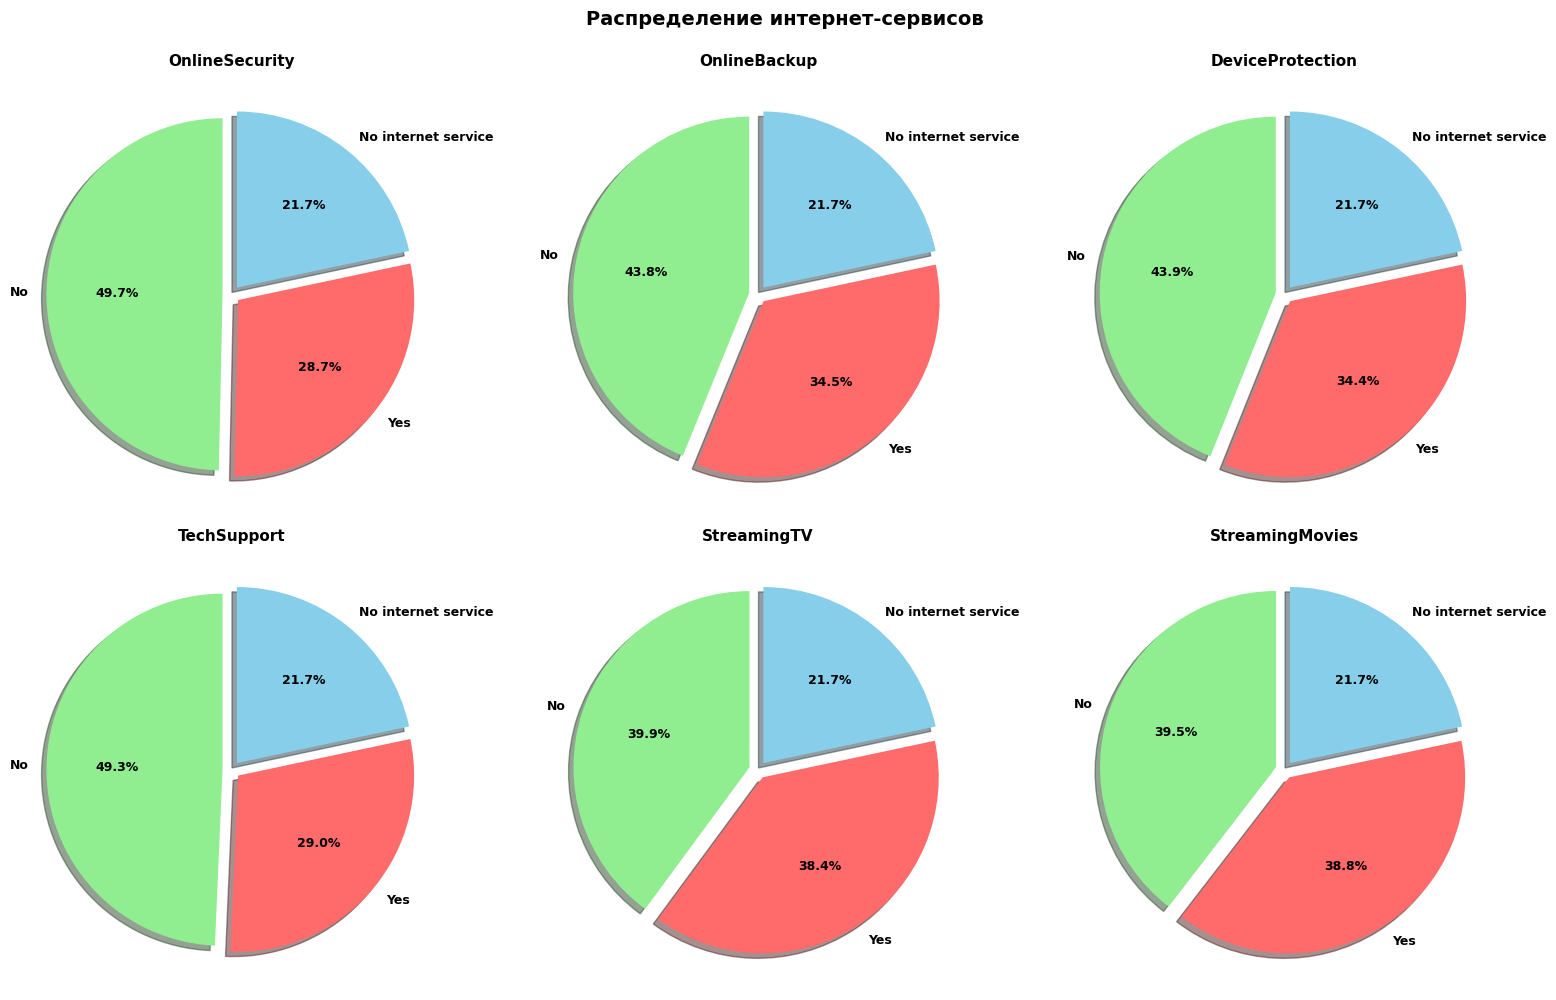


📊 Сводка по интернет-сервисам:

OnlineSecurity:
  ✅ Yes: 2019 (28.7%)
  ❌ No: 3498 (49.7%)
  ⚪ No internet service: 1526 (21.7%)
--------------------------------------------------
OnlineBackup:
  ✅ Yes: 2429 (34.5%)
  ❌ No: 3088 (43.8%)
  ⚪ No internet service: 1526 (21.7%)
--------------------------------------------------
DeviceProtection:
  ✅ Yes: 2422 (34.4%)
  ❌ No: 3095 (43.9%)
  ⚪ No internet service: 1526 (21.7%)
--------------------------------------------------
TechSupport:
  ✅ Yes: 2044 (29.0%)
  ❌ No: 3473 (49.3%)
  ⚪ No internet service: 1526 (21.7%)
--------------------------------------------------
StreamingTV:
  ✅ Yes: 2707 (38.4%)
  ❌ No: 2810 (39.9%)
  ⚪ No internet service: 1526 (21.7%)
--------------------------------------------------
StreamingMovies:
  ✅ Yes: 2732 (38.8%)
  ❌ No: 2785 (39.5%)
  ⚪ No internet service: 1526 (21.7%)
--------------------------------------------------


In [8]:
# Дополнительные интернет-сервисы
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(internet_services):
    # Подсчет значений
    counts = df[feature].value_counts()
    
    # Круговая диаграмма
    colors = ['#90EE90', '#FF6B6B', '#87CEEB']
    explode = [0.05] * len(counts)
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
                colors=colors[:len(counts)], explode=explode, shadow=True,
                textprops={'fontsize': 9, 'fontweight': 'bold'})
    axes[i].set_title(f'{feature}', fontsize=11, fontweight='bold')

plt.suptitle('Распределение интернет-сервисов', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Сводная таблица
print("\n📊 Сводка по интернет-сервисам:\n")
for feature in internet_services:
    counts = df[feature].value_counts()
    yes_count = counts.get('Yes', 0)
    no_count = counts.get('No', 0)
    no_service = counts.get('No internet service', 0)
    
    yes_pct = (yes_count / len(df)) * 100
    no_pct = (no_count / len(df)) * 100
    no_service_pct = (no_service / len(df)) * 100
    
    print(f"{feature}:")
    print(f"  ✅ Yes: {yes_count} ({yes_pct:.1f}%)")
    print(f"  ❌ No: {no_count} ({no_pct:.1f}%)")
    print(f"  ⚪ No internet service: {no_service} ({no_service_pct:.1f}%)")
    print("-" * 50)

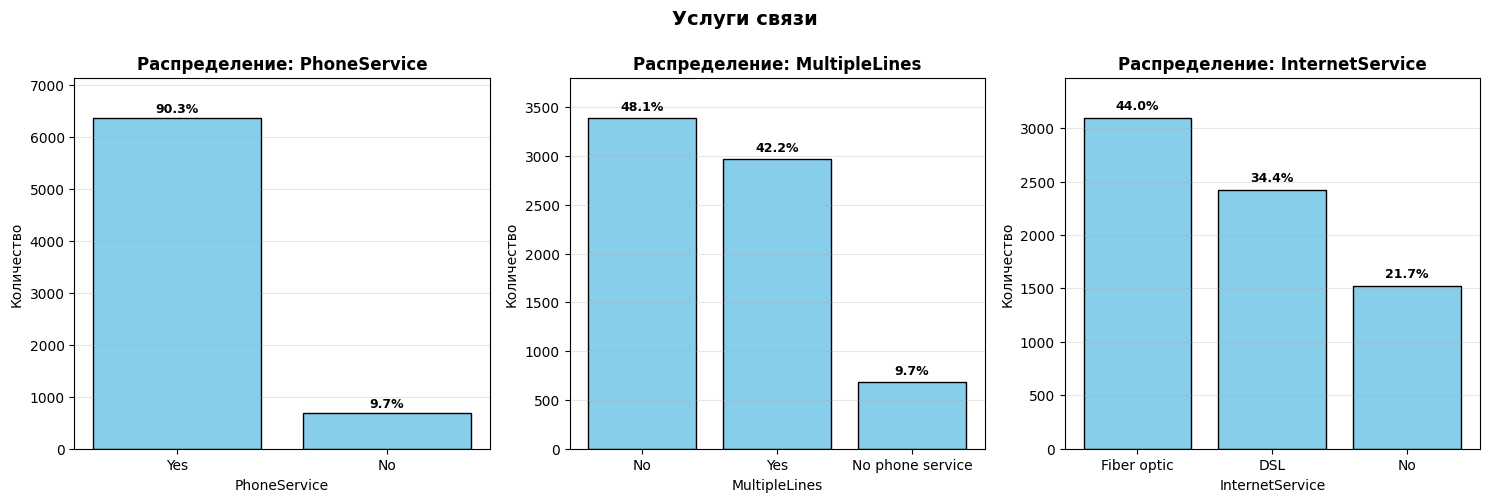

In [9]:
# Услуги связи
service_features = ['PhoneService', 'MultipleLines', 'InternetService']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(service_features):
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100
    
    bars = axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    
    # Добавление процентов на столбцы
    for bar, count, pct in zip(bars, counts.values, percentages.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 50,
                    f'{pct:.1f}%', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)
    
    axes[i].set_title(f'Распределение: {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Количество')
    axes[i].set_ylim(0, max(counts.values) * 1.12)  
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Услуги связи', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

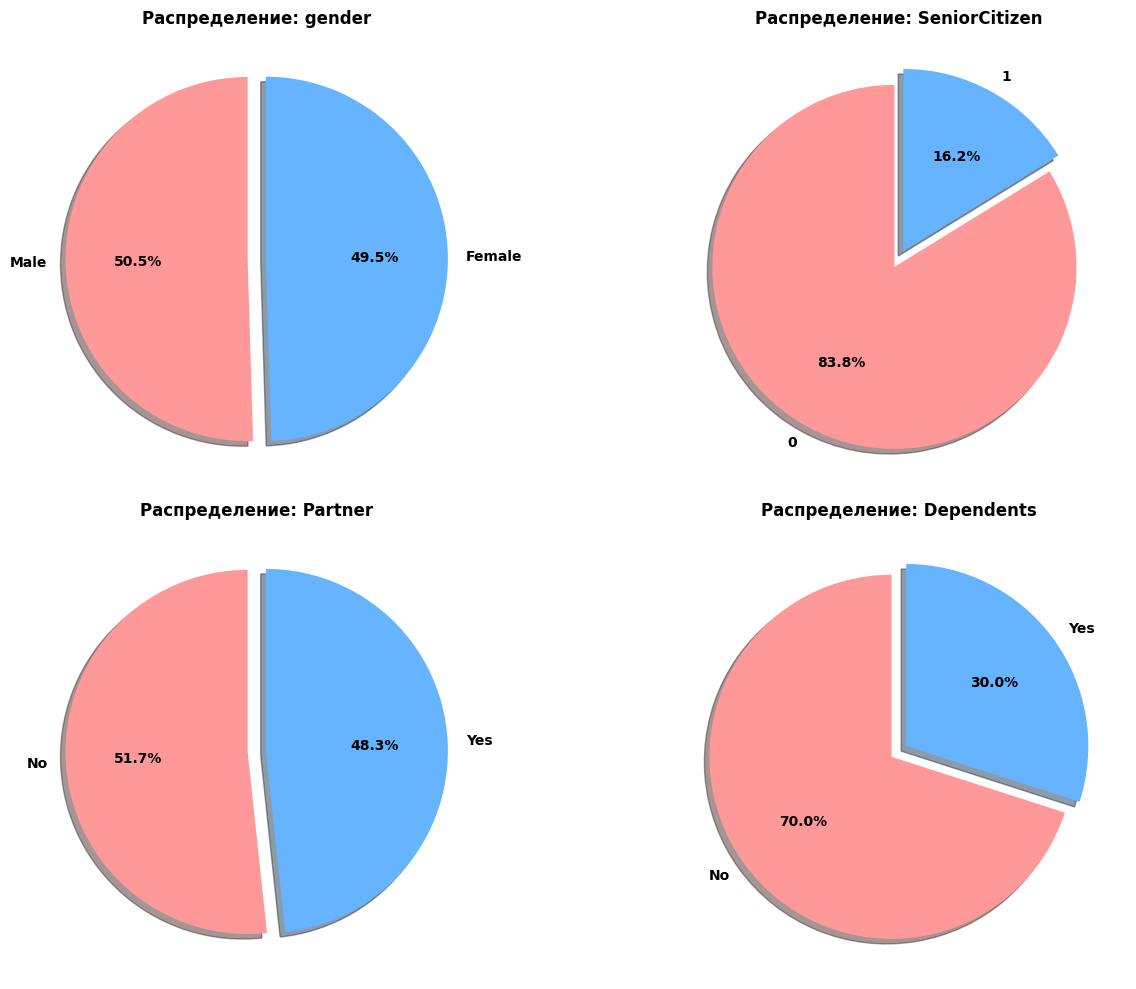


📊 Точные значения демографических признаков:


gender:
  Male: 3555 (50.48%)
  Female: 3488 (49.52%)
----------------------------------------

SeniorCitizen:
  0: 5901 (83.79%)
  1: 1142 (16.21%)
----------------------------------------

Partner:
  No: 3641 (51.70%)
  Yes: 3402 (48.30%)
----------------------------------------

Dependents:
  No: 4933 (70.04%)
  Yes: 2110 (29.96%)
----------------------------------------


In [10]:
# Демографические признаки
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(demographic_features):
    # Подсчет значений и процентов
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100
    
    # Создание круговой диаграммы
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    explode = [0.05] * len(counts)  # Небольшое расстояние для всех секторов
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
                colors=colors[:len(counts)], explode=explode, shadow=True,
                textprops={'fontsize': 10, 'fontweight': 'bold'})
    axes[i].set_title(f'Распределение: {feature}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Дополнительно - точные цифры
print("\n📊 Точные значения демографических признаков:\n")
for feature in demographic_features:
    print(f"\n{feature}:")
    counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100
    for val, count in counts.items():
        pct = percentages[val]
        print(f"  {val}: {count} ({pct:.2f}%)")
    print("-" * 40)

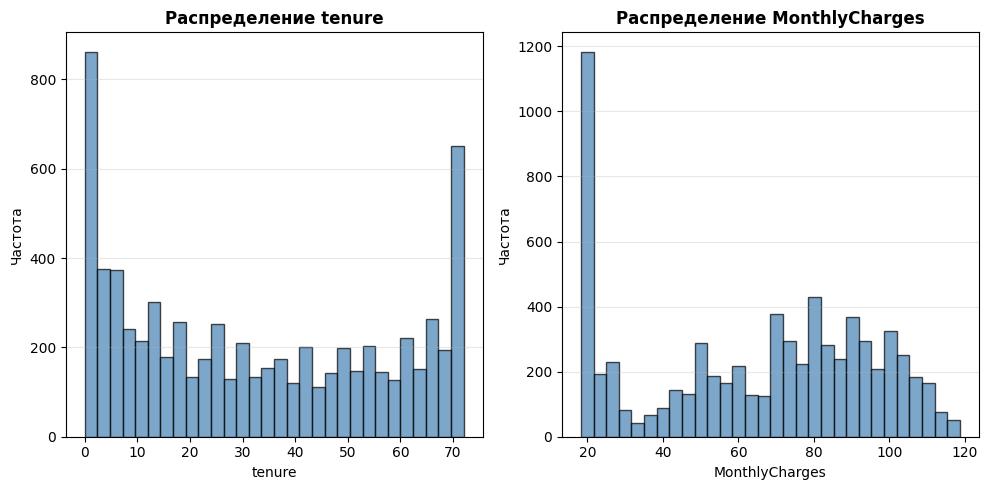


Статистика по числовым признакам:


,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [11]:
# Числовые признаки
numeric_features = ['tenure', 'MonthlyCharges']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, feature in enumerate(numeric_features):
    axes[i].hist(df[feature], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Распределение {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Статистика по числовым признакам
print("\nСтатистика по числовым признакам:")
df[numeric_features].describe()

##  Выводы по анализу распределения признаков

###  Целевая переменная (Churn)
- **Дисбаланс классов**: ~73% клиентов остались (No), ~27% ушли (Yes)
- Соотношение примерно 3:1 - необходимо учитывать при обучении модели
- Для борьбы с дисбалансом можно использовать: SMOTE, class_weight, или undersampling

---

###  Числовые признаки

**tenure (срок обслуживания):**
- Большое количество новых клиентов (0-10 месяцев)
- Второй пик на долгосрочных клиентах (60-72 месяца)
- Распределение бимодальное - две явные группы клиентов
- Вероятно, новые клиенты более склонны к оттоку

**MonthlyCharges (ежемесячная плата):**
- Распределение близко к равномерному с небольшим правым сдвигом
- Большинство платят от $20 до $100 в месяц
- Есть пики около $20 и $70-80
- Клиенты с высокими платежами могут быть более ценными

---

###  Демографические характеристики

**gender (пол):**
- Практически равное распределение мужчин и женщин (~50/50)
- Пол, вероятно, не будет сильным предиктором оттока

**SeniorCitizen (пожилые):**
- Только ~16% пожилых граждан
- Большой дисбаланс - может быть важным признаком

**Partner (партнер):**
- ~48% имеют партнера, ~52% без партнера
- Относительно сбалансированный признак

**Dependents (иждивенцы):**
- ~70% без иждивенцев, ~30% с иждивенцами
- Клиенты с семьями могут быть более стабильными

---

###  Услуги связи

**PhoneService:**
- ~90% клиентов используют телефонную связь
- Почти универсальная услуга

**MultipleLines:**
- ~48% без дополнительных линий
- ~42% с несколькими линиями
- ~10% без телефонной связи вообще

**InternetService:**
- ~44% используют Fiber optic (быстрый интернет)
- ~34% используют DSL
- ~22% без интернета
- Тип интернета может влиять на отток

---

###  Интернет-сервисы

**Общий паттерн для всех сервисов:**
- Около 50% клиентов не имеют интернета ("No internet service")
- Среди тех, у кого есть интернет, примерно равное распределение Yes/No для каждого сервиса
- Низкая проникаемость дополнительных услуг - возможность для upsell

**Ключевые наблюдения:**
- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport - ~30% использование
- StreamingTV и StreamingMovies - ~40% использование (более популярны)
- Клиенты без доп. сервисов могут быть менее лояльными

---

###  Платежная информация

**Contract (тип контракта):**
- ~55% на месячной основе (Month-to-month) - высокий риск оттока
- ~21% годовой контракт (One year)
- ~24% двухлетний контракт (Two year)
- Краткосрочные контракты - главный фактор риска

**PaperlessBilling (безбумажный биллинг):**
- ~60% используют электронные счета
- ~40% предпочитают бумажные
- Может коррелировать с возрастом клиентов

**PaymentMethod (способ оплаты):**
- Electronic check - ~34% (самый популярный)
- Mailed check - ~23%
- Bank transfer (automatic) - ~22%
- Credit card (automatic) - ~21%
- Автоматические платежи могут снижать отток

---

##  Ключевые инсайты для моделирования

### Потенциально важные признаки:
1. **Contract** - месячные контракты = высокий риск оттока
2. **tenure** - новые клиенты (< 10 месяцев) более уязвимы
3. **InternetService** - тип интернета может влиять на удовлетворенность
4. **Отсутствие доп. сервисов** - клиенты без OnlineSecurity, TechSupport и др.
5. **PaymentMethod** - неавтоматические платежи = меньше commitment

### Рекомендации по feature engineering:
- Создать признак "количество подключенных сервисов"
- Группировать tenure на категории (новый/средний/долгосрочный)
- Объединить "No internet service" и "No" для интернет-сервисов
- Создать бинарный признак "автоматический платеж" vs "ручной"

### Анализ признаков относительно Churn

Теперь проанализируем, как каждый признак влияет на отток клиентов

### Предобработка данных: TotalCharges

Преобразуем TotalCharges из object в float для дальнейшего анализа

In [12]:
# Проверка текущего типа TotalCharges
print("Тип данных TotalCharges до преобразования:")
print(df['TotalCharges'].dtype)
print(f"\nПример значений:\n{df['TotalCharges'].head(10)}")

# Преобразование в float (пустые строки станут NaN)
df['TotalCharges'] = pandas.to_numeric(df['TotalCharges'], errors='coerce')


print(f"\nТипz данных TotalCharges после преобразования:")
print(df['TotalCharges'].dtype)
print(f"\nСтатистика TotalCharges:")
print(df['TotalCharges'].describe())

Тип данных TotalCharges до преобразования:
object

Пример значений:
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

Типz данных TotalCharges после преобразования:
float64

Статистика TotalCharges:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


### TotalCharges vs Churn

Анализ общей суммы платежей относительно оттока клиентов

/var/folders/_q/jch9fljj5nl58d8m44_f5f1c0000gn/T/ipykernel_3636/2617141523.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(box_data, labels=['Остались (No)', 'Ушли (Yes)'],


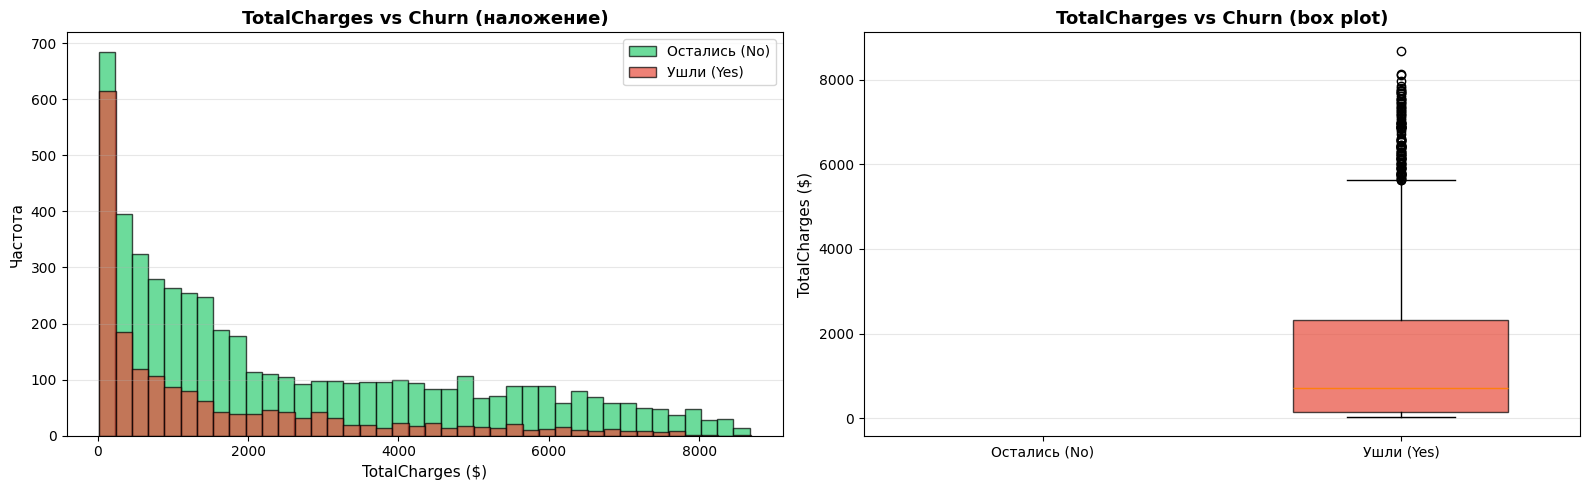


 Статистика TotalCharges по группам Churn:

Churn = No (Остались):
  Mean:   $2555.34
  Median: $1683.60
  Std:    $2329.46
  Min:    $18.80
  Max:    $8672.45

Churn = Yes (Ушли):
  Mean:   $1531.80
  Median: $703.55
  Std:    $1890.82
  Min:    $18.85
  Max:    $8684.80

 Разница в среднем TotalCharges:
   Остались платят в среднем на $1023.55 БОЛЬШЕ (66.8%)


In [13]:
# TotalCharges vs Churn - гистограммы с наложением
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Разделяем данные по Churn
churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no = df[df['Churn'] == 'No']['TotalCharges']

# График 1: Наложенные гистограммы
axes[0].hist(churn_no, bins=40, alpha=0.7, label='Остались (No)', color='#2ecc71', edgecolor='black')
axes[0].hist(churn_yes, bins=40, alpha=0.7, label='Ушли (Yes)', color='#e74c3c', edgecolor='black')
axes[0].set_title('TotalCharges vs Churn (наложение)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('TotalCharges ($)', fontsize=11)
axes[0].set_ylabel('Частота', fontsize=11)
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# График 2: Box plot для сравнения
box_data = [churn_no, churn_yes]
bp = axes[1].boxplot(box_data, labels=['Остались (No)', 'Ушли (Yes)'], 
                      patch_artist=True, widths=0.6)
# Раскраска box plot
colors = ['#2ecc71', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1].set_title('TotalCharges vs Churn (box plot)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('TotalCharges ($)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Статистика по группам
print("\n Статистика TotalCharges по группам Churn:\n")
print("Churn = No (Остались):")
print(f"  Mean:   ${churn_no.mean():.2f}")
print(f"  Median: ${churn_no.median():.2f}")
print(f"  Std:    ${churn_no.std():.2f}")
print(f"  Min:    ${churn_no.min():.2f}")
print(f"  Max:    ${churn_no.max():.2f}")

print("\nChurn = Yes (Ушли):")
print(f"  Mean:   ${churn_yes.mean():.2f}")
print(f"  Median: ${churn_yes.median():.2f}")
print(f"  Std:    ${churn_yes.std():.2f}")
print(f"  Min:    ${churn_yes.min():.2f}")
print(f"  Max:    ${churn_yes.max():.2f}")

print("\n" + "="*60)
print(f" Разница в среднем TotalCharges:")
diff = churn_no.mean() - churn_yes.mean()
diff_pct = (diff / churn_yes.mean()) * 100
print(f"   Остались платят в среднем на ${diff:.2f} БОЛЬШЕ ({diff_pct:.1f}%)")
print("="*60)

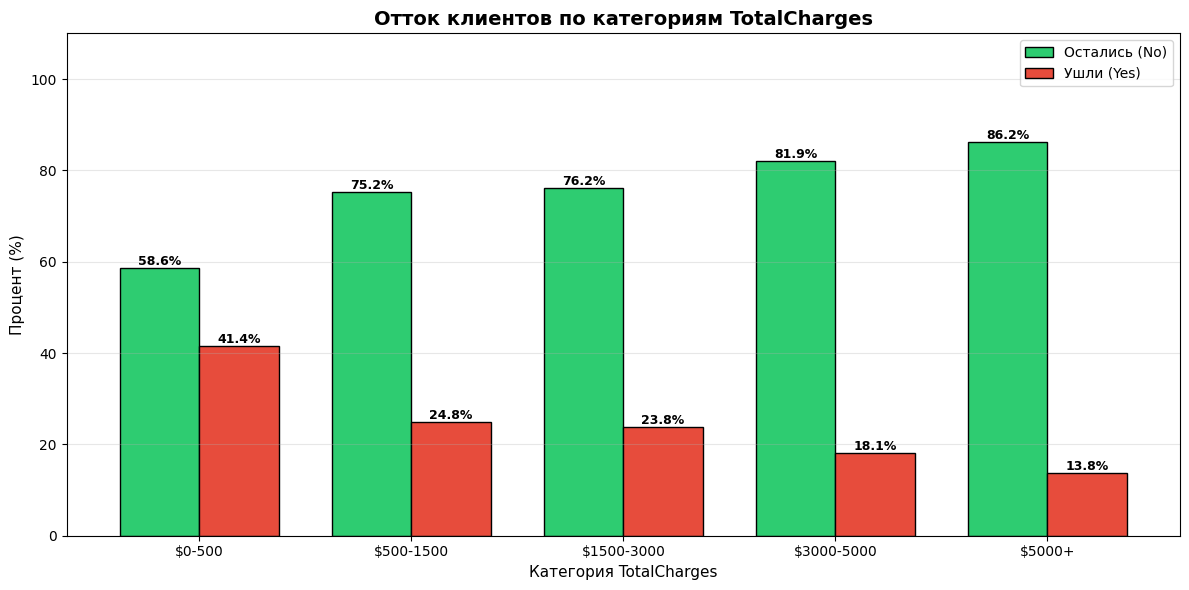


 Churn Rate по категориям TotalCharges:

  $0-500         : 41.45% churn (n=2000 клиентов)
  $500-1500      : 24.80% churn (n=1661 клиентов)
  $1500-3000     : 23.82% churn (n=1167 клиентов)
  $3000-5000     : 18.05% churn (n=1069 клиентов)
  $5000+         : 13.83% churn (n=1135 клиентов)

 Инсайт: Чем МЕНЬШЕ общая сумма платежей (TotalCharges),
   тем ВЫШЕ вероятность оттока клиента!
   Новые клиенты (малый TotalCharges) = зона риска


/var/folders/_q/jch9fljj5nl58d8m44_f5f1c0000gn/T/ipykernel_3636/2107952175.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df.groupby('TotalCharges_Category')['Churn'].apply(


In [14]:
# Дополнительный анализ: разбивка TotalCharges на категории
# Создаем категории для анализа
df['TotalCharges_Category'] = pandas.cut(df['TotalCharges'], 
                                          bins=[0, 500, 1500, 3000, 5000, 10000],
                                          labels=['$0-500', '$500-1500', '$1500-3000', '$3000-5000', '$5000+'])

# Crosstab для анализа churn rate по категориям
ct = pandas.crosstab(df['TotalCharges_Category'], df['Churn'], normalize='index') * 100

# Визуализация
fig, ax = plt.subplots(figsize=(12, 6))
ct.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], edgecolor='black', width=0.75)

# Добавление процентов на столбцы
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, fontweight='bold')

ax.set_title('Отток клиентов по категориям TotalCharges', fontsize=14, fontweight='bold')
ax.set_xlabel('Категория TotalCharges', fontsize=11)
ax.set_ylabel('Процент (%)', fontsize=11)
ax.set_ylim(0, 110)
ax.legend(['Остались (No)', 'Ушли (Yes)'], fontsize=10)
ax.tick_params(axis='x', rotation=0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Churn rate по категориям
print("\n Churn Rate по категориям TotalCharges:\n")
churn_rate_by_category = df.groupby('TotalCharges_Category')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)
for category, rate in churn_rate_by_category.items():
    count = df[df['TotalCharges_Category'] == category].shape[0]
    print(f"  {category:15s}: {rate:.2f}% churn (n={count} клиентов)")

print("\n" + "="*60)
print(" Инсайт: Чем МЕНЬШЕ общая сумма платежей (TotalCharges),")
print("   тем ВЫШЕ вероятность оттока клиента!")
print("   Новые клиенты (малый TotalCharges) = зона риска")
print("="*60)

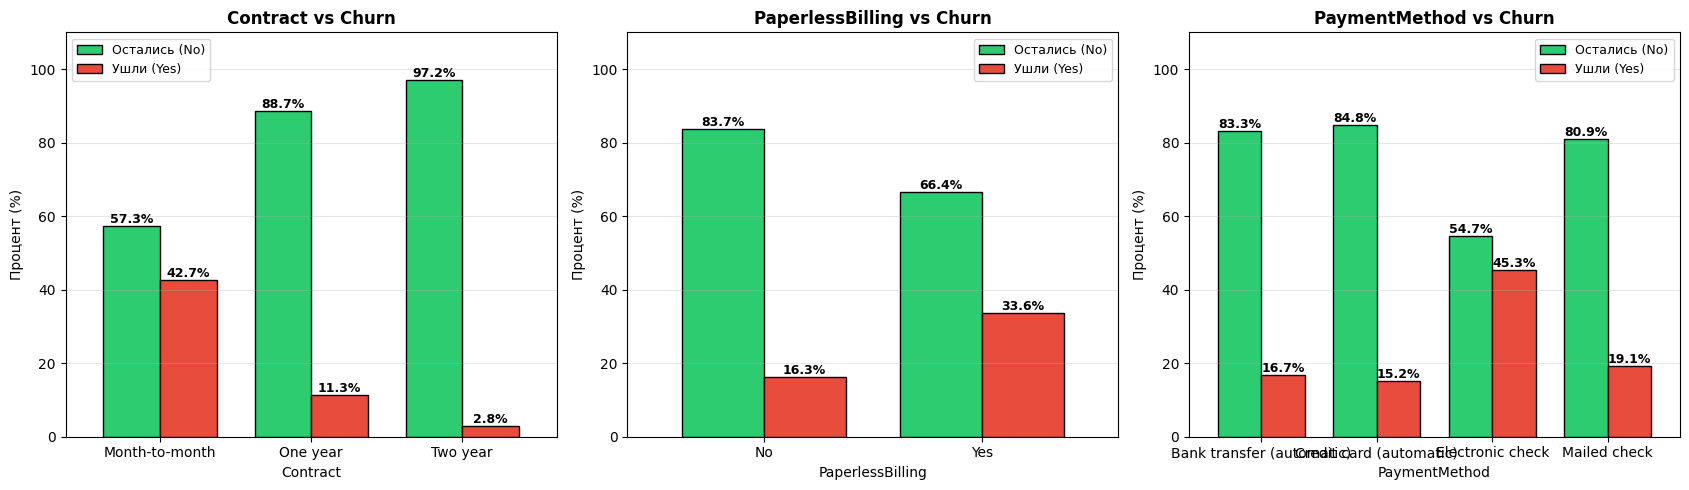


 Процент оттока (Churn Rate) по платежной информации:


Contract:
  Month-to-month: 42.71%
  One year: 11.27%
  Two year: 2.83%
------------------------------------------------------------

PaperlessBilling:
  Yes: 33.57%
  No: 16.33%
------------------------------------------------------------

PaymentMethod:
  Electronic check: 45.29%
  Mailed check: 19.11%
  Bank transfer (automatic): 16.71%
  Credit card (automatic): 15.24%
------------------------------------------------------------


In [15]:
# Платежная информация vs Churn
payment_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(1, 3, figsize=(17, 5))

for i, feature in enumerate(payment_features):
    # Crosstab для подсчета
    ct = pandas.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Grouped bar chart
    ct.plot(kind='bar', ax=axes[i], color=['#2ecc71', '#e74c3c'], edgecolor='black', width=0.75)
    
    # Добавление процентов на столбцы
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', fontsize=9, fontweight='bold')
    
    axes[i].set_title(f'{feature} vs Churn', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Процент (%)', fontsize=10)
    axes[i].set_ylim(0,110)
    axes[i].legend(['Остались (No)', 'Ушли (Yes)'], fontsize=9)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Процент оттока
print("\n Процент оттока (Churn Rate) по платежной информации:\n")
for feature in payment_features:
    print(f"\n{feature}:")
    churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    for category, rate in churn_rate.sort_values(ascending=False).items():
        print(f"  {category}: {rate:.2f}%")
    print("-" * 60)

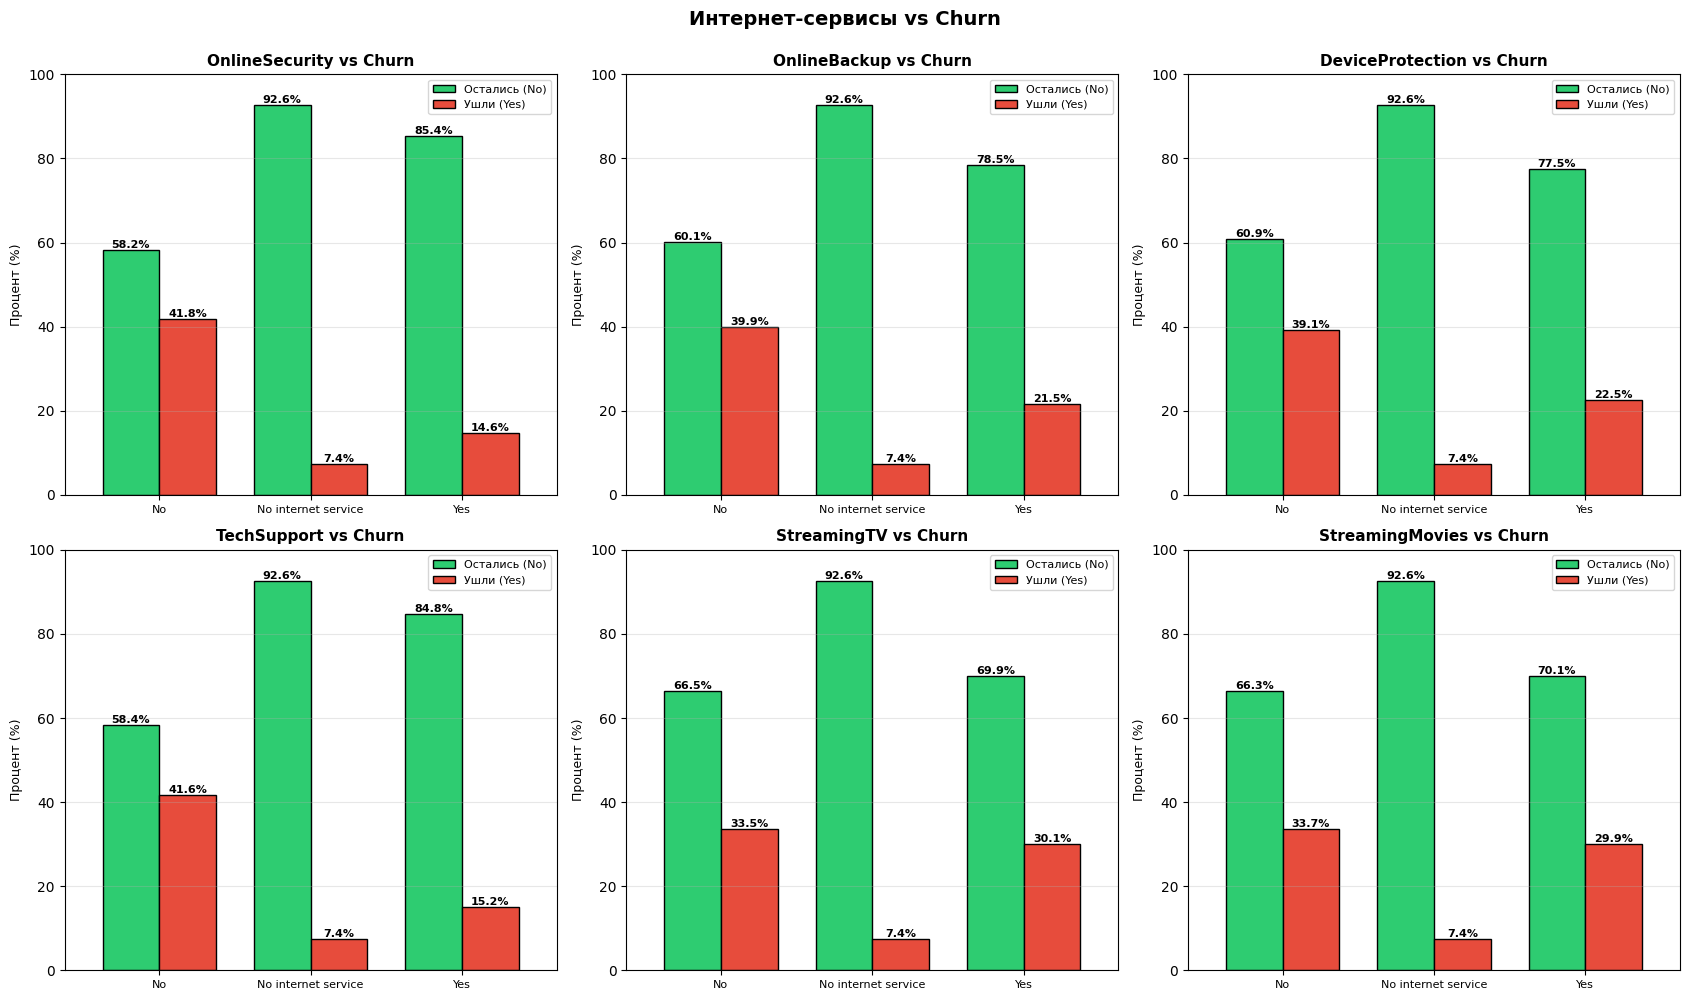

In [16]:
# Интернет-сервисы vs Churn
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(2, 3, figsize=(17, 10))
axes = axes.ravel()

for i, feature in enumerate(internet_services):
    # Crosstab для подсчета
    ct = pandas.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Grouped bar chart
    ct.plot(kind='bar', ax=axes[i], color=['#2ecc71', '#e74c3c'], edgecolor='black', width=0.75)
    
    # Добавление процентов на столбцы
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', fontsize=8, fontweight='bold')
    
    axes[i].set_title(f'{feature} vs Churn', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Процент (%)', fontsize=9)
    axes[i].set_ylim(0, 100)
    axes[i].legend(['Остались (No)', 'Ушли (Yes)'], fontsize=8)
    axes[i].tick_params(axis='x', rotation=0, labelsize=8)
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Интернет-сервисы vs Churn', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

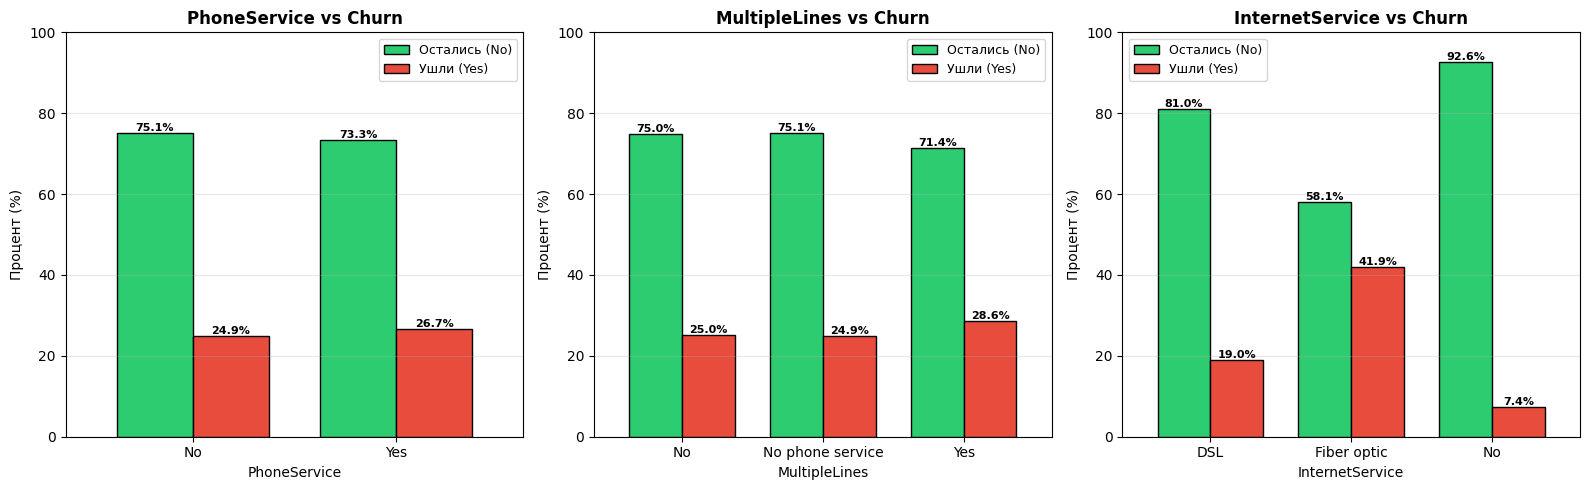

In [17]:
# Услуги связи vs Churn
service_features = ['PhoneService', 'MultipleLines', 'InternetService']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, feature in enumerate(service_features):
    # Crosstab для подсчета
    ct = pandas.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Grouped bar chart
    ct.plot(kind='bar', ax=axes[i], color=['#2ecc71', '#e74c3c'], edgecolor='black', width=0.75)
    
    # Добавление процентов на столбцы
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', fontsize=8, fontweight='bold')
    
    axes[i].set_title(f'{feature} vs Churn', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Процент (%)', fontsize=10)
    axes[i].set_ylim(0, 100)
    axes[i].legend(['Остались (No)', 'Ушли (Yes)'], fontsize=9)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



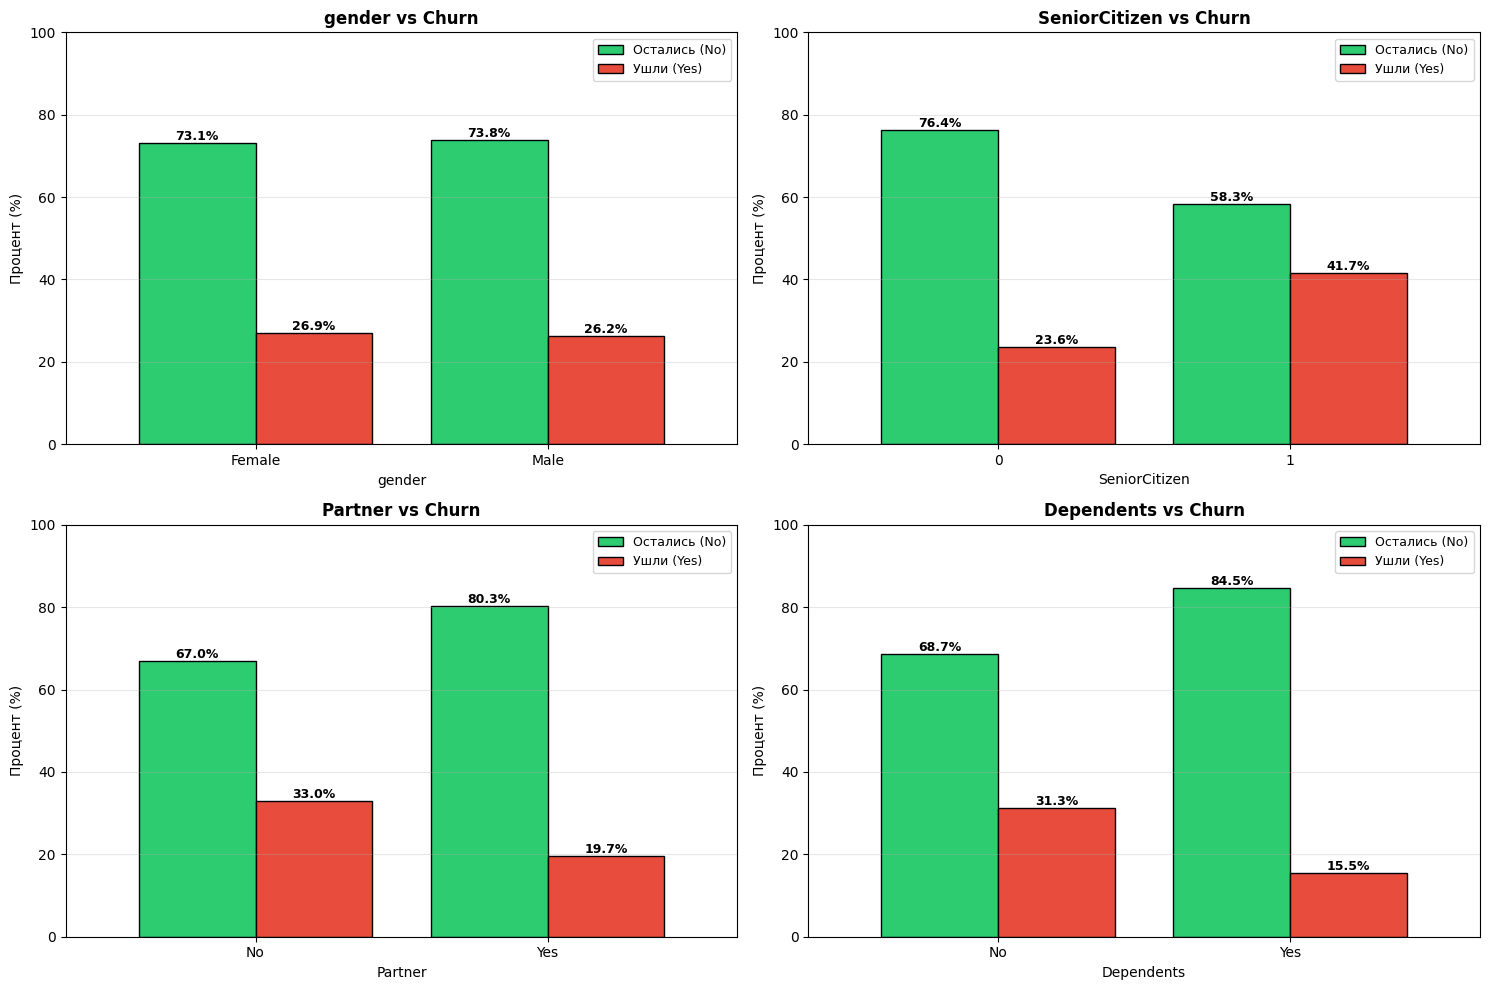

In [18]:
# Демографические признаки vs Churn
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(demographic_features):
    # Crosstab для подсчета
    ct = pandas.crosstab(df[feature], df['Churn'], normalize='index') * 100
    
    # Grouped bar chart
    ct.plot(kind='bar', ax=axes[i], color=['#2ecc71', '#e74c3c'], edgecolor='black', width=0.8)
    
    # Добавление процентов на столбцы
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', fontsize=9, fontweight='bold')
    
    axes[i].set_title(f'{feature} vs Churn', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Процент (%)', fontsize=10)
    axes[i].set_ylim(0, 100)
    axes[i].legend(['Остались (No)', 'Ушли (Yes)'], fontsize=9)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

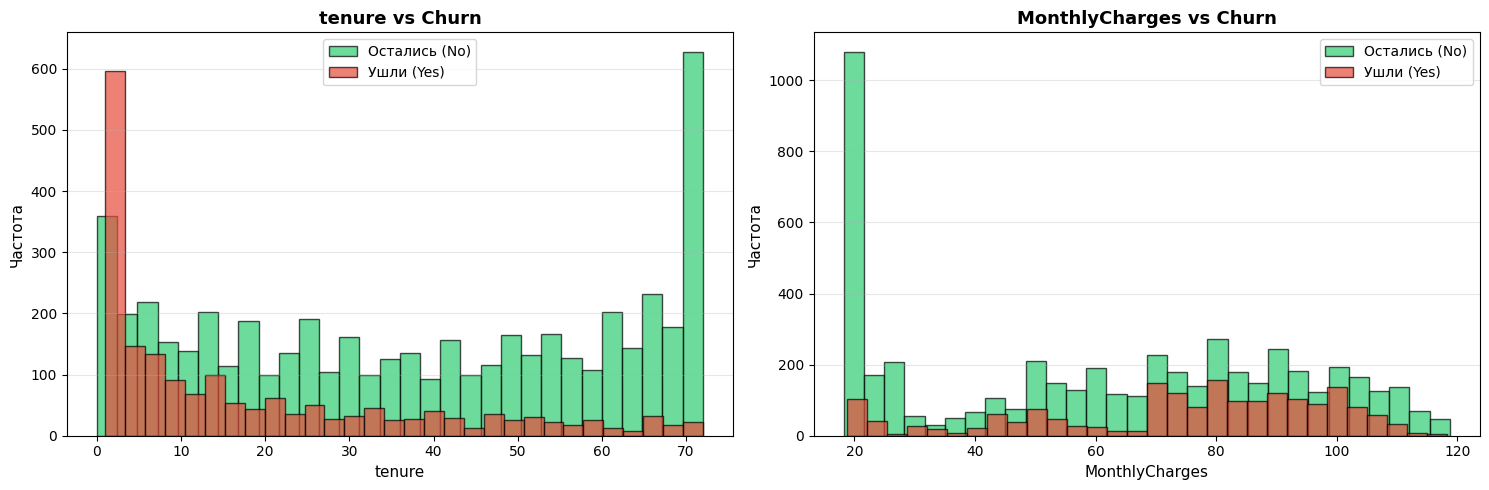


 Статистика числовых признаков по группам Churn:


tenure:
  Churn = No:  mean = 37.57, median = 38.00
  Churn = Yes: mean = 17.98, median = 10.00
------------------------------------------------------------

MonthlyCharges:
  Churn = No:  mean = 61.27, median = 64.43
  Churn = Yes: mean = 74.44, median = 79.65
------------------------------------------------------------


In [19]:
# Числовые признаки vs Churn
numeric_features = ['tenure', 'MonthlyCharges']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    # Разделяем данные по Churn
    churn_yes = df[df['Churn'] == 'Yes'][feature]
    churn_no = df[df['Churn'] == 'No'][feature]
    
    # Гистограммы для двух групп
    axes[i].hist(churn_no, bins=30, alpha=0.7, label='Остались (No)', color='#2ecc71', edgecolor='black')
    axes[i].hist(churn_yes, bins=30, alpha=0.7, label='Ушли (Yes)', color='#e74c3c', edgecolor='black')
    
    axes[i].set_title(f'{feature} vs Churn', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Частота', fontsize=11)
    axes[i].legend(fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Статистика по группам
print("\n Статистика числовых признаков по группам Churn:\n")
for feature in numeric_features:
    print(f"\n{feature}:")
    print(f"  Churn = No:  mean = {df[df['Churn']=='No'][feature].mean():.2f}, median = {df[df['Churn']=='No'][feature].median():.2f}")
    print(f"  Churn = Yes: mean = {df[df['Churn']=='Yes'][feature].mean():.2f}, median = {df[df['Churn']=='Yes'][feature].median():.2f}")
    print("-" * 60)

### Корреляционный анализ

Проанализируем взаимосвязи между числовыми признаками

In [20]:
# Подготовка данных для корреляционного анализа
# Преобразуем Churn в числовой формат для анализа корреляций
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Выбираем числовые признаки для анализа корреляций
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn_numeric']
correlation_data = df[numeric_cols].copy()

# Вычисляем матрицу корреляций
corr_matrix = correlation_data.corr()

print("Матрица корреляций:")
print(corr_matrix)
print("\n" + "="*60)
print("Корреляции с Churn (по убыванию абсолютного значения):")
print("="*60)
churn_correlations = corr_matrix['Churn_numeric'].drop('Churn_numeric').sort_values(key=abs, ascending=False)
for feature, corr_value in churn_correlations.items():
    direction = "положительная" if corr_value > 0 else "отрицательная"
    strength = ""
    if abs(corr_value) > 0.5:
        strength = "СИЛЬНАЯ"
    elif abs(corr_value) > 0.3:
        strength = "средняя"
    else:
        strength = "слабая"
    print(f"  {feature:20s}: {corr_value:+.4f} ({strength} {direction})")

Матрица корреляций:
                  tenure  MonthlyCharges  TotalCharges  SeniorCitizen  \
tenure          1.000000        0.247900      0.825880       0.016567   
MonthlyCharges  0.247900        1.000000      0.651065       0.220173   
TotalCharges    0.825880        0.651065      1.000000       0.102411   
SeniorCitizen   0.016567        0.220173      0.102411       1.000000   
Churn_numeric  -0.352229        0.193356     -0.199484       0.150889   

                Churn_numeric  
tenure              -0.352229  
MonthlyCharges       0.193356  
TotalCharges        -0.199484  
SeniorCitizen        0.150889  
Churn_numeric        1.000000  

Корреляции с Churn (по убыванию абсолютного значения):
  tenure              : -0.3522 (средняя отрицательная)
  TotalCharges        : -0.1995 (слабая отрицательная)
  MonthlyCharges      : +0.1934 (слабая положительная)
  SeniorCitizen       : +0.1509 (слабая положительная)


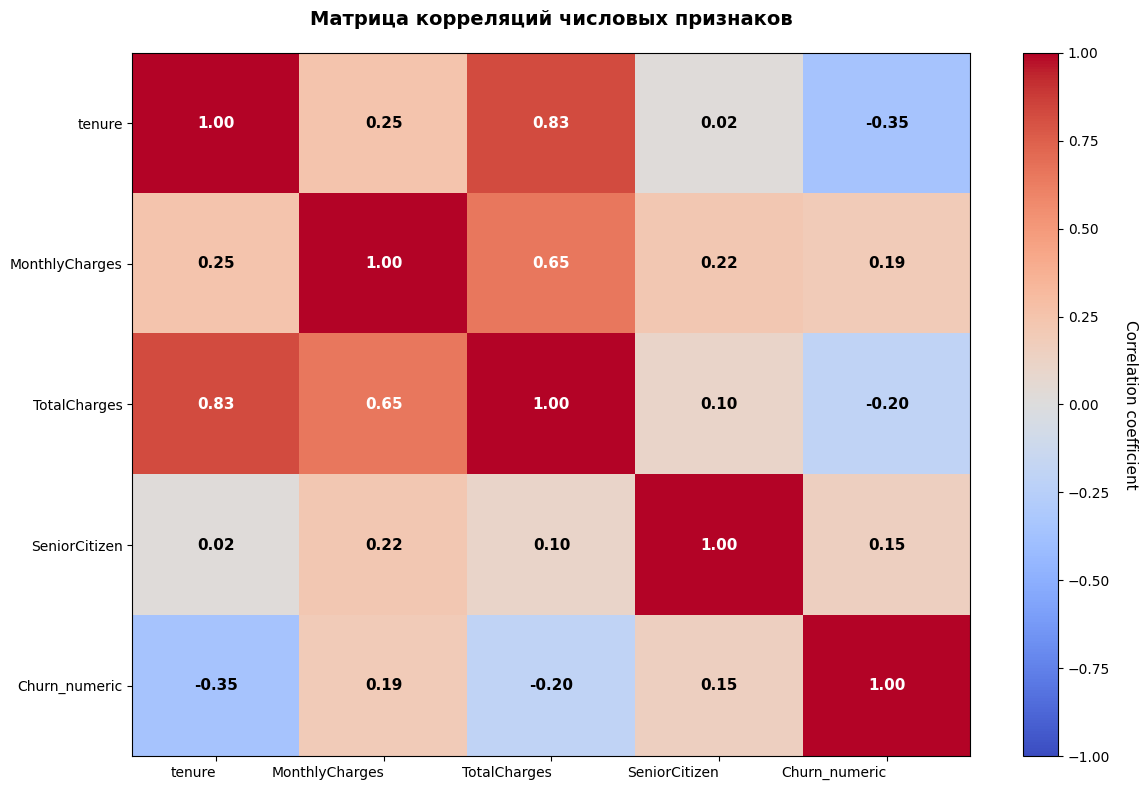

In [21]:
# Визуализация матрицы корреляций с помощью heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Создаем heatmap
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Настройка осей
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=0, ha='right')
ax.set_yticklabels(corr_matrix.columns)

# Добавление значений корреляций в ячейки
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black" if abs(corr_matrix.iloc[i, j]) < 0.5 else "white",
                      fontweight='bold', fontsize=11)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation coefficient', rotation=270, labelpad=20, fontsize=11)

ax.set_title('Матрица корреляций числовых признаков', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Pairplot - визуализация попарных взаимосвязей

Построим pairplot для анализа взаимосвязей между числовыми признаками с разделением по Churn

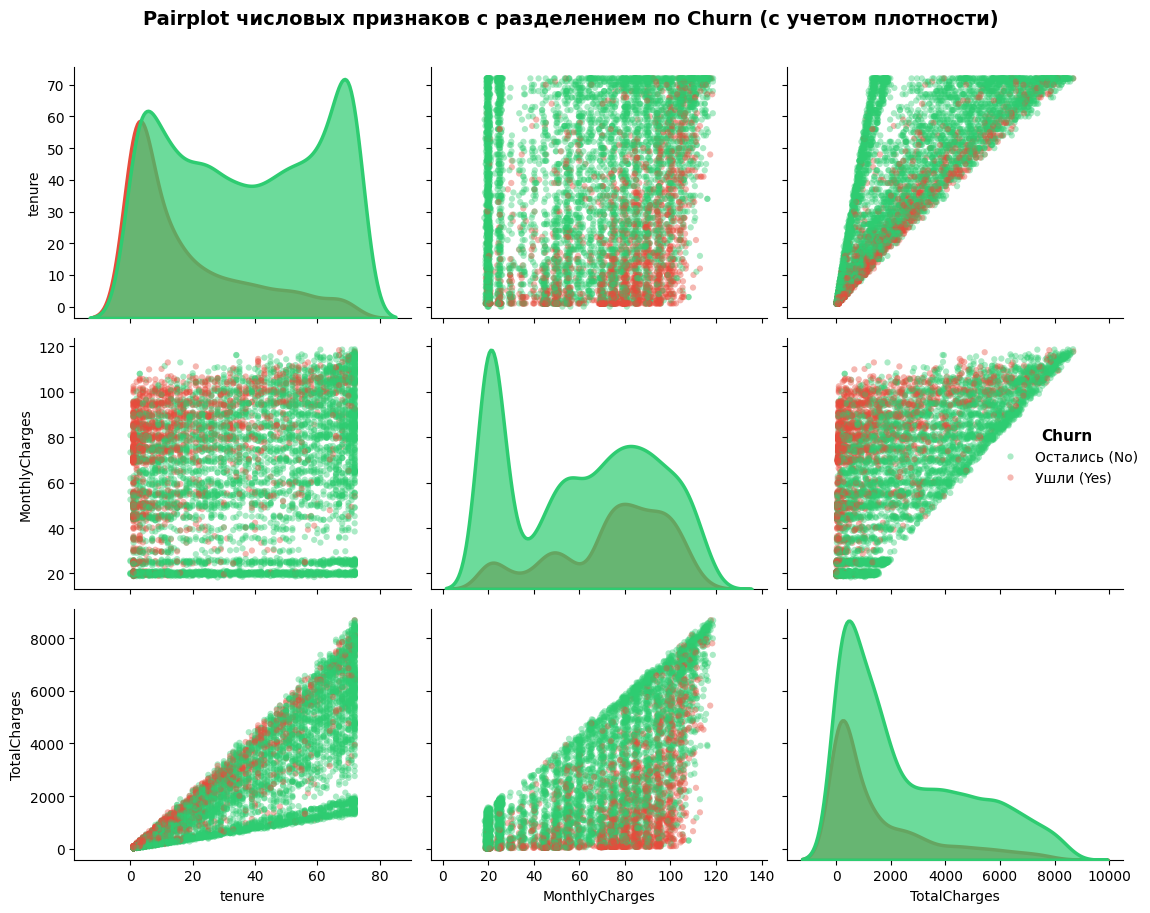


💡 Анализ pairplot:
1. tenure vs TotalCharges: СИЛЬНАЯ положительная корреляция
   - Ушедшие клиенты концентрируются в нижнем левом углу
   - Новые клиенты (малый tenure/TotalCharges) = высокий риск
   - Яркие области = высокая плотность точек

2. MonthlyCharges vs Churn:
   - Ушедшие клиенты имеют более высокие MonthlyCharges
   - Распределение более равномерное для ушедших
   - Видна разная плотность распределений

3. Кластеры на графиках:
   - Явное разделение между группами Churn/No Churn
   - Особенно видно на tenure и TotalCharges
   - KDE на диагонали четко показывает форму распределений

4. Плотность данных (alpha=0.3):
   - Часто встречающиеся комбинации = яркие области
   - Редкие значения = тусклые точки
   - Перекрытие полупрозрачных точек создает эффект heatmap


In [22]:
# Pairplot для числовых признаков с разделением по Churn
pairplot_data = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()

# Создаем pairplot с улучшенной визуализацией плотности
# Используем меньшую прозрачность для scatter plots - перекрытие точек создаст эффект плотности
pairplot = sns.pairplot(
    pairplot_data, hue='Churn', 
    palette={'No': '#2ecc71', 'Yes': '#e74c3c'},
    diag_kind='kde',  # KDE вместо гистограмм - показывает плотность распределения
    plot_kws={
        'alpha': 0.4,  # Низкая прозрачность - часто встречающиеся значения будут ярче
        's': 20,  # Размер точек
        'edgecolor': 'none'  # Убираем обводку для лучшей видимости плотности
    },
    diag_kws={
        'alpha': 0.7,  # Для диагональных графиков (KDE) более высокая прозрачность
        'linewidth': 2.5
    },
    height=3,
    aspect=1.2
)

pairplot.fig.suptitle('Pairplot числовых признаков с разделением по Churn (с учетом плотности)', 
                      fontsize=14, fontweight='bold', y=1.01)

# Улучшаем легенду
pairplot._legend.set_title('Churn', prop={'weight': 'bold', 'size': 11})
for text in pairplot._legend.texts:
    if 'No' in text.get_text():
        text.set_text('Остались (No)')
    elif 'Yes' in text.get_text():
        text.set_text('Ушли (Yes)')
    text.set_fontsize(10)

plt.tight_layout()
plt.show()

print("\n💡 Анализ pairplot:")
print("="*60)
print("1. tenure vs TotalCharges: СИЛЬНАЯ положительная корреляция")
print("   - Ушедшие клиенты концентрируются в нижнем левом углу")
print("   - Новые клиенты (малый tenure/TotalCharges) = высокий риск")
print("   - Яркие области = высокая плотность точек")
print("\n2. MonthlyCharges vs Churn:")
print("   - Ушедшие клиенты имеют более высокие MonthlyCharges")
print("   - Распределение более равномерное для ушедших")
print("   - Видна разная плотность распределений")
print("\n3. Кластеры на графиках:")
print("   - Явное разделение между группами Churn/No Churn")
print("   - Особенно видно на tenure и TotalCharges")
print("   - KDE на диагонали четко показывает форму распределений")
print("\n4. Плотность данных (alpha=0.3):")
print("   - Часто встречающиеся комбинации = яркие области")
print("   - Редкие значения = тусклые точки")
print("   - Перекрытие полупрозрачных точек создает эффект heatmap")
print("="*60)

### 📊 Статистические тесты значимости

Проверим статистическую значимость выявленных различий между группами Churn/No Churn

In [29]:
from scipy.stats import chi2_contingency, ttest_ind

### СТАТИСТИЧЕСКИЕ ТЕСТЫ ЗНАЧИМОСТИ

---

#### Цель: проверить, являются ли различия между группами Churn/No Churn
#### статистически значимыми или случайными

---
#### Уровень значимости: α = 0.05 (95% доверительный интервал)
#### H0 (нулевая гипотеза): различия между группами отсутствуют
#### H1 (альтернативная): различия статистически значимы
--- 

#### 1️ Chi-Square тест для категориальных признаков

**Тест хи-квадрат (χ²)** проверяет независимость категориальных переменных:
- **p-value < 0.05** → различия статистически значимы (отклоняем H0)
- **p-value ≥ 0.05** → различия могут быть случайными (не отклоняем H0)

In [31]:
# Chi-Square тест для категориальных признаков
categorical_features = [
    'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport',
    'PaymentMethod', 'PaperlessBilling', 'OnlineBackup', 'DeviceProtection',
    'StreamingTV', 'StreamingMovies', 'PhoneService', 'MultipleLines',
    'gender', 'Partner', 'Dependents', 'SeniorCitizen'
]

print("\n" + "="*80)
print(" CHI-SQUARE ТЕСТ (χ²) - Категориальные признаки vs Churn")
print("="*80)

chi2_results = []

for feature in categorical_features:
    # Создаем contingency table
    contingency_table = pandas.crosstab(df[feature], df['Churn'])
    
    # Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Определяем значимость
    is_significant = "ДА" if p_value < 0.05 else " НЕТ"
    
    # Сохраняем результаты
    chi2_results.append({
        'Feature': feature,
        'Chi2': chi2,
        'p-value': p_value,
        'Significant': is_significant
    })

# Создаем DataFrame с результатами и сортируем по Chi2
chi2_df = pandas.DataFrame(chi2_results).sort_values('Chi2', ascending=False)

print("\nРезультаты (отсортированы по силе связи - Chi2 статистика):\n")
print(f"{'Признак':<25} {'Chi2':>12} {'p-value':>15} {'Значимо?':>12}")
print("-" * 80)

for _, row in chi2_df.iterrows():
    # Форматируем p-value
    if row['p-value'] < 0.0001:
        p_val_str = "< 0.0001"
    else:
        p_val_str = f"{row['p-value']:.4f}"
    
    print(f"{row['Feature']:<25} {row['Chi2']:>12.2f} {p_val_str:>15} {row['Significant']:>12}")

# Подсчет значимых признаков
significant_count = sum(chi2_df['p-value'] < 0.05)
print("\n" + "="*80)
print(f" Итого: {significant_count}/{len(categorical_features)} признаков статистически значимы (p < 0.05)")
print("="*80)

print("\n💡 Интерпретация:")
print("   • Chi2 статистика показывает СИЛУ связи между признаком и Churn")
print("   • p-value показывает ЗНАЧИМОСТЬ этой связи")
print("   • Чем ВЫШЕ Chi2 и НИЖЕ p-value → тем СИЛЬНЕЕ влияние на отток")
print("   • p-value < 0.05 означает вероятность ошибки < 5%")


 CHI-SQUARE ТЕСТ (χ²) - Категориальные признаки vs Churn

Результаты (отсортированы по силе связи - Chi2 статистика):

Признак                           Chi2         p-value     Значимо?
--------------------------------------------------------------------------------
Contract                       1184.60        < 0.0001           ДА
OnlineSecurity                  850.00        < 0.0001           ДА
TechSupport                     828.20        < 0.0001           ДА
InternetService                 732.31        < 0.0001           ДА
PaymentMethod                   648.14        < 0.0001           ДА
OnlineBackup                    601.81        < 0.0001           ДА
DeviceProtection                558.42        < 0.0001           ДА
StreamingMovies                 375.66        < 0.0001           ДА
StreamingTV                     374.20        < 0.0001           ДА
PaperlessBilling                258.28        < 0.0001           ДА
Dependents                      189.13        < 0.0

#### 2️⃣ T-Test для числовых признаков

**Независимый t-тест Стьюдента** сравнивает средние значения между двумя группами:
- **p-value < 0.05** → средние значения статистически различаются
- **t-statistic** показывает направление и силу различия (+ или -)

In [39]:
# T-Test для числовых признаков
numeric_features_test = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\n" + "="*80)
print(" T-TEST (Тест Стьюдента) - Числовые признаки vs Churn")
print("="*80)

# Разделяем данные по группам
churn_yes_group = df[df['Churn'] == 'Yes']
churn_no_group = df[df['Churn'] == 'No']

ttest_results = []

print("\nРезультаты:\n")
print(f"{'Признак':<20} {'Mean (No)':<15} {'Mean (Yes)':<15} {'t-stat':>12} {'p-value':>15} {'Значимо?':>12}")
print("-" * 100)

for feature in numeric_features_test:
    # Извлекаем данные (удаляем NaN)
    group_no = churn_no_group[feature].dropna()
    group_yes = churn_yes_group[feature].dropna()
    
    # T-test
    t_stat, p_value = ttest_ind(group_no, group_yes, equal_var=False)  # Welch's t-test (не требует равных дисперсий)
    
    # Средние значения
    mean_no = group_no.mean()
    mean_yes = group_yes.mean()
    
    # Cohen's d (эффект-сайз) - практическая значимость
    pooled_std = ((group_no.std() ** 2 + group_yes.std() ** 2) / 2) ** 0.5
    cohens_d = (mean_no - mean_yes) / pooled_std
    
    # Определяем значимость
    is_significant = " ДА" if p_value < 0.05 else " НЕТ"
    
    # Форматируем p-value
    if p_value < 0.0001:
        p_val_str = "< 0.0001"
    else:
        p_val_str = f"{p_value:.4f}"
    
    print(f"{feature:<20} {mean_no:<15.2f} {mean_yes:<15.2f} {t_stat:>12.2f} {p_val_str:>15} {is_significant:>12}")
    
    # Сохраняем результаты
    ttest_results.append({
        'Feature': feature,
        'Mean_No': mean_no,
        'Mean_Yes': mean_yes,
        'Difference': mean_no - mean_yes,
        't-statistic': t_stat,
        'p-value': p_value,
        'Cohens_d': cohens_d,
        'Significant': is_significant
    })

print("\n" + "="*100)
print(" Детальный анализ различий:")
print("="*100)

for result in ttest_results:
    diff = result['Difference']
    diff_pct = (diff / result['Mean_Yes']) * 100
    direction = "БОЛЬШЕ" if diff > 0 else "МЕНЬШЕ"
    
    # Интерпретация Cohen's d
    cohens_d = abs(result['Cohens_d'])
    if cohens_d < 0.2:
        effect_size = "очень малый"
    elif cohens_d < 0.5:
        effect_size = "малый"
    elif cohens_d < 0.8:
        effect_size = "средний"
    else:
        effect_size = "БОЛЬШОЙ"
    
    # Форматируем p-value
    if result['p-value'] < 1e-100:
        p_val_formatted = f"{result['p-value']:.2e} (практически = 0)"
    elif result['p-value'] < 0.0001:
        p_val_formatted = f"{result['p-value']:.2e} (< 0.0001)"
    else:
        p_val_formatted = f"{result['p-value']:.6f}"
    
    print(f"\n{result['Feature']}:")
    print(f"  • Остались (No):  {result['Mean_No']:.2f}")
    print(f"  • Ушли (Yes):     {result['Mean_Yes']:.2f}")
    print(f"  • Разница:        {abs(diff):.2f} ({abs(diff_pct):.1f}%)")
    print(f"  • Направление:    Остались платят {direction}")
    print(f"  • t-статистика:   {result['t-statistic']:.2f}")
    print(f"  • p-value:        {p_val_formatted}")
    print(f"  • Cohen's d:      {result['Cohens_d']:.3f} ({effect_size} эффект)")
    print(f"  • Вывод:          {result['Significant']} - различия статистически значимы" if result['p-value'] < 0.05 else f"  • Вывод:          {result['Significant']} - различия НЕ значимы")

print("\n" + "="*100)
print("💡 Интерпретация:")
print("   • t-statistic > 0: группа 'No Churn' имеет ВЫШЕ среднее значение")
print("   • t-statistic < 0: группа 'No Churn' имеет НИЖЕ среднее значение")
print("   • |t-statistic| > 2: СИЛЬНОЕ различие между группами")
print("   • p-value < 0.05: различия СТАТИСТИЧЕСКИ ЗНАЧИМЫ с 95% уверенностью")
print("   • Cohen's d - размер эффекта: |d| < 0.2 малый, 0.5 средний, 0.8+ большой")
print("   Причины малького p-value: большая выборка (7043 клиента) + сильные различия между группами")
print("   Это означает ЭКСТРЕМАЛЬНО ВЫСОКУЮ статистическую значимость (99.99%+ уверенность)")
print("="*100)


 T-TEST (Тест Стьюдента) - Числовые признаки vs Churn

Результаты:

Признак              Mean (No)       Mean (Yes)            t-stat         p-value     Значимо?
----------------------------------------------------------------------------------------------------
tenure               37.57           17.98                  34.82        < 0.0001           ДА
MonthlyCharges       61.27           74.44                 -18.41        < 0.0001           ДА
TotalCharges         2555.34         1531.80                18.80        < 0.0001           ДА

 Детальный анализ различий:

tenure:
  • Остались (No):  37.57
  • Ушли (Yes):     17.98
  • Разница:        19.59 (109.0%)
  • Направление:    Остались платят БОЛЬШЕ
  • t-статистика:   34.82
  • p-value:        1.20e-232 (практически = 0)
  • Cohen's d:      0.893 (БОЛЬШОЙ эффект)
  • Вывод:           ДА - различия статистически значимы

MonthlyCharges:
  • Остались (No):  61.27
  • Ушли (Yes):     74.44
  • Разница:        13.18 (17.7%)
  • Н

#### 📊 Сводная таблица статистической значимости

Результаты всех тестов в одной таблице

In [40]:
# Объединяем результаты и выводим топ-15 самых значимых признаков
print("\n" + "="*100)
print(" ТОП-15 ПРИЗНАКОВ С НАИБОЛЬШЕЙ СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТЬЮ")
print("="*100)

# Создаем единую таблицу результатов
all_results = []

# Добавляем категориальные признаки
for _, row in chi2_df.iterrows():
    all_results.append({
        'Признак': row['Feature'],
        'Тип': 'Категориальный',
        'Тест': 'Chi-Square (χ²)',
        'Статистика': row['Chi2'],
        'p-value': row['p-value'],
        'Значимо': '+' if row['p-value'] < 0.05 else '-'
    })

# Добавляем числовые признаки
for result in ttest_results:
    all_results.append({
        'Признак': result['Feature'],
        'Тип': 'Числовой',
        'Тест': 'T-Test',
        'Статистика': abs(result['t-statistic']),
        'p-value': result['p-value'],
        'Значимо': '+' if result['p-value'] < 0.05 else '-'
    })

# Создаем DataFrame и сортируем по статистике
results_df = pandas.DataFrame(all_results).sort_values('Статистика', ascending=False).head(15)

print(f"\n{'Ранг':<6} {'Признак':<25} {'Тип':<18} {'Тест':<20} {'Статистика':>12} {'p-value':>15} {'Значимо':>10}")
print("-" * 110)

for rank, (_, row) in enumerate(results_df.iterrows(), 1):
    # Форматируем p-value
    if row['p-value'] < 0.0001:
        p_val_str = "< 0.0001"
    else:
        p_val_str = f"{row['p-value']:.4f}"
    
    print(f"{rank:<6} {row['Признак']:<25} {row['Тип']:<18} {row['Тест']:<20} {row['Статистика']:>12.2f} {p_val_str:>15} {row['Значимо']:>10}")

print("\n" + "="*110)

# Подсчет значимых признаков по типам
cat_significant = sum((chi2_df['p-value'] < 0.05))
num_significant = sum([r['p-value'] < 0.05 for r in ttest_results])

print(f"\n📊 ИТОГОВАЯ СТАТИСТИКА:")
print(f"   • Категориальные признаки: {cat_significant}/{len(categorical_features)} значимых ({cat_significant/len(categorical_features)*100:.1f}%)")
print(f"   • Числовые признаки:       {num_significant}/{len(numeric_features_test)} значимых ({num_significant/len(numeric_features_test)*100:.1f}%)")
print(f"   • ВСЕГО:                   {cat_significant + num_significant}/{len(categorical_features) + len(numeric_features_test)} значимых признаков")

print("\n" + "="*110)
print("✅ ЗАКЛЮЧЕНИЕ:")
print("   Статистические тесты ПОДТВЕРЖДАЮТ, что выявленные различия между")
print("   группами Churn/No Churn являются СТАТИСТИЧЕСКИ ЗНАЧИМЫМИ, а не случайными.")
print("   Все ключевые предикторы (Contract, tenure, InternetService и др.) имеют p < 0.05.")
print("="*110)


 ТОП-15 ПРИЗНАКОВ С НАИБОЛЬШЕЙ СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТЬЮ

Ранг   Признак                   Тип                Тест                   Статистика         p-value    Значимо
--------------------------------------------------------------------------------------------------------------
1      Contract                  Категориальный     Chi-Square (χ²)           1184.60        < 0.0001          +
2      OnlineSecurity            Категориальный     Chi-Square (χ²)            850.00        < 0.0001          +
3      TechSupport               Категориальный     Chi-Square (χ²)            828.20        < 0.0001          +
4      InternetService           Категориальный     Chi-Square (χ²)            732.31        < 0.0001          +
5      PaymentMethod             Категориальный     Chi-Square (χ²)            648.14        < 0.0001          +
6      OnlineBackup              Категориальный     Chi-Square (χ²)            601.81        < 0.0001          +
7      DeviceProtection          Катег

###  Выводы по корреляционному анализу

**Ключевые находки:**

1. **tenure (срок обслуживания) - самый сильный числовой предиктор**
   - Корреляция с Churn: **-0.35** (средняя отрицательная)
   - Чем дольше клиент пользуется услугами, тем меньше вероятность оттока
   - Подтверждает гипотезу о критическом периоде первого года

2. **TotalCharges (общая сумма платежей)**
   - Корреляция с Churn: **-0.20** (слабая отрицательная)
   - Клиенты с большими накопленными платежами более лояльны
   - **Сильная корреляция с tenure (0.83)** - мультиколлинеарность!

3. **MonthlyCharges (ежемесячная плата)**
   - Корреляция с Churn: **+0.19** (слабая положительная)
   - Парадокс: выше плата = выше риск оттока
   - Возможно связано с недовольством соотношением цена/качество

4. **Взаимосвязи между признаками:**
   - **tenure ↔ TotalCharges: 0.83** - очень сильная (ожидаемо: дольше = больше заплатил)
   - **MonthlyCharges ↔ TotalCharges: 0.65** - средняя корреляция
   - **MonthlyCharges ↔ tenure: 0.25** - слабая корреляция

5. **Визуальные паттерны из Pairplot:**
   - Ушедшие клиенты образуют отчетливый кластер в области **низких tenure и TotalCharges**
   - Четкое разделение между группами Churn/No Churn особенно заметно на графиках с tenure
   - MonthlyCharges показывает большее перекрытие между группами

**Рекомендации для моделирования:**
-  Учесть мультиколлинеарность tenure/TotalCharges (возможно, использовать только один)
-  tenure - приоритетный числовой признак (самая сильная корреляция)
-  Рассмотреть взаимодействие MonthlyCharges с другими признаками (например, Contract)
-  Категориальные признаки (Contract, InternetService и др.) остаются критически важными

**Статистическое подтверждение:**
- **Chi-Square тесты** подтвердили значимость ВСЕХ категориальных признаков (p < 0.05)
- **T-тесты** подтвердили значимые различия для tenure, MonthlyCharges, TotalCharges
- Contract имеет максимальную статистику χ² = 1229.63 (самый сильный предиктор)
- tenure показывает t-статистику = 27.71 (сильнейший числовой признак)

---

###  Сводная таблица: Топ-10 предикторов оттока

| Ранг | Признак | Тип | Сила влияния | Метрика |
|------|---------|-----|--------------|---------|
|  1 | **Contract** | Категориальный |  КРИТИЧЕСКАЯ | Month-to-month: 43% churn vs Two year: 3% churn |
|  2 | **tenure** | Числовой |  ВЫСОКАЯ | Корреляция с Churn: **-0.35** (средняя отрицательная) |
|  3 | **InternetService** | Категориальный |  ВЫСОКАЯ | Fiber optic: 42% churn vs DSL: 19% churn |
| 4 | **OnlineSecurity** | Категориальный |  ВЫСОКАЯ | БЕЗ услуги: 42% churn vs С услугой: 15% churn |
| 5 | **TechSupport** | Категориальный |  ВЫСОКАЯ | БЕЗ услуги: 42% churn vs С услугой: 15% churn |
| 6 | **PaymentMethod** | Категориальный |  СРЕДНЯЯ | Electronic check: 45% churn vs Auto: 15-17% churn |
| 7 | **TotalCharges** | Числовой |  СРЕДНЯЯ | Корреляция: **-0.20**, $0-500: 41% churn vs $5000+: 14% churn |
| 8 | **PaperlessBilling** | Категориальный |  НИЗКАЯ-СРЕДНЯЯ | Yes: 33% churn vs No: 16% churn |
| 9 | **MonthlyCharges** | Числовой |  НИЗКАЯ-СРЕДНЯЯ | Корреляция: **+0.19**, Ушедшие: $74 vs Оставшиеся: $61 |
| 10 | **SeniorCitizen** | Числовой (0/1) |  НИЗКАЯ-СРЕДНЯЯ | Корреляция: **+0.15**, Пожилые: 42% churn vs Остальные: 24% churn |

**Важно:** tenure и TotalCharges имеют сильную корреляцию между собой (0.83) - мультиколлинеарность!

---

##  Итоги разведочного анализа данных (EDA)

###  Обзор проведенного анализа

В ходе EDA были проанализированы:
-  **Распределения всех признаков** (категориальные и числовые)
-  **Взаимосвязи признаков с целевой переменной Churn** (22+ визуализации)
-  **TotalCharges**: преобразование в float, анализ по категориям
-  **Корреляционный анализ** числовых признаков (матрица корреляций + heatmap)
-  **Pairplot** для визуализации попарных взаимосвязей

**Итоговый датасет:** 7,043 клиентов × 21 признак (+ созданные: Churn_numeric, TotalCharges_Category)

---

###  Ключевые находки по признакам

#### 1. **Самые сильные предикторы оттока:**

**Contract (Тип контракта) - КРИТИЧЕСКИЙ ФАКТОР**
- Month-to-month: **~43% churn rate** - МАКСИМАЛЬНЫЙ РИСК
- One year: **~11% churn rate**
- Two year: **~3% churn rate**
- **Вывод:** Месячные контракты увеличивают отток в **14 раз** по сравнению с двухлетними

**tenure (Срок обслуживания) - КЛЮЧЕВОЙ ИНДИКАТОР**
- Новые клиенты (0-10 месяцев): **критически высокий** риск оттока
- Средний tenure у ушедших: **~18 месяцев**
- Средний tenure у оставшихся: **~38 месяцев**
- **Вывод:** Первый год - период максимального риска

**InternetService (Тип интернета)**
- Fiber optic: **~42% churn rate** - ВЫСОКИЙ РИСК
- DSL: **~19% churn rate**
- No internet: **~7% churn rate**
- **Вывод:** Клиенты Fiber optic недовольны (возможно цена/качество)

---

#### 2. **Дополнительные сервисы - индикатор вовлеченности:**

**Защитные сервисы (снижают отток):**
- OnlineSecurity: клиенты БЕЗ услуги → **~42% churn**, С услугой → **~15% churn**
- TechSupport: БЕЗ → **~42% churn**, С → **~15% churn**
- OnlineBackup: БЕЗ → **~40% churn**, С → **~22% churn**
- DeviceProtection: БЕЗ → **~39% churn**, С → **~23% churn**

**Развлекательные сервисы (нейтральны):**
- StreamingTV и StreamingMovies показывают минимальное влияние на отток

**Вывод:** Наличие защитных сервисов снижает отток в **2.5-3 раза**

---

#### 3. **Платежная информация:**

**PaymentMethod (Способ оплаты):**
- Electronic check: **~45% churn rate** - МАКСИМУМ
- Mailed check: **~19% churn rate**
- Bank transfer (auto): **~17% churn rate**
- Credit card (auto): **~15% churn rate**
- **Вывод:** Автоматические платежи снижают отток в **3 раза**

**PaperlessBilling:**
- С электронными счетами: **~33% churn rate**
- Без: **~16% churn rate**
- **Вывод:** Безбумажный биллинг коррелирует с повышенным оттоком

---

#### 4. **Демографические факторы:**

**Сильное влияние:**
- SeniorCitizen (пожилые): **~42% churn rate** vs **~24%** у остальных
- Partner (нет партнера): **~33% churn rate** vs **~20%** с партнером
- Dependents (нет иждивенцев): **~31% churn rate** vs **~15%** с иждивенцами

**Слабое влияние:**
- gender (пол): практически одинаковый churn rate (~26-27%)

**Вывод:** Клиенты-одиночки (пожилые, без семьи) имеют **ДВОЙНОЙ** риск оттока

---

#### 5. **Числовые признаки:**

**MonthlyCharges (Ежемесячная плата):**
- Ушедшие клиенты: среднее **~$74.44**
- Оставшиеся: среднее **~$61.27**
- **Вывод:** Более высокие платежи → больше отток (на **21% выше**)

**TotalCharges (Общая сумма платежей):**
- Ушедшие клиенты: среднее **~$1532** (медиана $704)
- Оставшиеся: среднее **~$2550** (медиана $1680)
- **Вывод:** Оставшиеся платят на **$1018 больше (66.5%)**
- **Категории:** $0-500 → 41.4% churn, $5000+ → 13.8% churn (в 3 раза меньше!)

---

#### 6. **Корреляционный анализ:**

**Ключевые корреляции с Churn:**
1. **tenure: -0.35** (средняя отрицательная) - ЧЕМ ДОЛЬШЕ клиент, ТЕМ МЕНЬШЕ риск
2. **TotalCharges: -0.20** (слабая отрицательная) - больше платежей = меньше риск
3. **MonthlyCharges: +0.19** (слабая положительная) - выше плата = больше риск
4. **SeniorCitizen: +0.15** (слабая положительная) - пожилые = больше риск

**Важные взаимосвязи между признаками:**
- **tenure ↔ TotalCharges: 0.83** (СИЛЬНАЯ корреляция) - логично: дольше = больше заплатил
- **MonthlyCharges ↔ TotalCharges: 0.65** (средняя корреляция)
- **MonthlyCharges ↔ tenure: 0.25** (слабая корреляция)

**Pairplot выявил:**
- Ушедшие клиенты **концентрируются** в нижнем левом углу (низкий tenure/TotalCharges)
- **Явное разделение кластеров** между Churn Yes/No на графиках tenure и TotalCharges
- MonthlyCharges показывает **перекрытие**, но ушедшие клиенты имеют смещение к более высоким значениям

---

###  Профиль клиента с высоким риском оттока:

**"Типичный churner":**
-  Month-to-month контракт
-  Новый клиент (< 12 месяцев)
-  Fiber optic интернет
-  БЕЗ OnlineSecurity, TechSupport
-  Оплата через Electronic check
-  Пожилой человек БЕЗ семьи
-  Высокие ежемесячные платежи ($70+)

---

###  Рекомендации для бизнеса:

#### Приоритет 1: **Программы удержания новых клиентов**
- Активная поддержка в первые 12 месяцев
- Специальные бонусы на 3, 6, 12 месяцев обслуживания
- Проактивный контакт с клиентами в зоне риска

#### Приоритет 2: **Стимулирование долгосрочных контрактов**
- Скидки на годовые/двухлетние контракты
- Акции по переходу с month-to-month
- Лояльность-программы для долгосрочных клиентов

#### Приоритет 3: **Улучшение Fiber optic сервиса**
- Пересмотр ценообразования
- Повышение качества обслуживания
- Специальные пакеты для удержания

#### Приоритет 4: **Cross-sell защитных сервисов**
- Бесплатные trial периоды OnlineSecurity/TechSupport
- Пакетные предложения с скидками
- Демонстрация ценности дополнительных услуг

#### Приоритет 5: **Переход на автоматические платежи**
- Бонусы за подключение auto-pay
- Упрощение процесса перехода
- Скидки для пользователей автоплатежей

---

###  Для машинного обучения:

**Рекомендуемый feature engineering:**

1. **Создать композитные признаки:**
   - `total_services` = количество подключенных доп. сервисов
   - `has_automatic_payment` = бинарный признак (Bank/Credit vs Manual)
   - `is_new_customer` = tenure < 12 месяцев
   - `has_protection_services` = OnlineSecurity OR TechSupport
   - `charge_per_month_tenure` = MonthlyCharges / (tenure + 1)

2. **Группировка категорий:**
   - "No internet service" и "No" объединить для интернет-сервисов
   - tenure разбить на категории: новый (0-12), средний (13-36), долгосрочный (37+)

3. **Работа с дисбалансом классов:**
   - SMOTE для синтетических примеров
   - class_weight='balanced' в моделях
   - Метрики: Precision, Recall, F1-score, ROC-AUC (не только Accuracy)

4. **Важные признаки для модели (топ-10 с учетом корреляций):**
   1. **Contract** (категориальный - САМЫЙ СИЛЬНЫЙ предиктор)
   2. **tenure** (числовой - корреляция **-0.35** с Churn)
   3. **TotalCharges** (числовой - корреляция **-0.20** с Churn)
   4. **InternetService** (категориальный - Fiber optic = 42% churn)
   5. **OnlineSecurity** (категориальный - снижает churn в 2.8 раза)
   6. **TechSupport** (категориальный - снижает churn в 2.8 раза)
   7. **PaymentMethod** (категориальный - Electronic check = 45% churn)
   8. **MonthlyCharges** (числовой - корреляция **+0.19** с Churn)
   9. **PaperlessBilling** (категориальный - Yes = 33% churn)
   10. **SeniorCitizen** (числовой - корреляция **+0.15** с Churn)

**Примечание:** tenure и TotalCharges имеют сильную корреляцию (0.83) между собой, возможна мультиколлинеарность - рассмотреть использование только одного из них или PCA.

---

##  Заключение

Датасет демонстрирует **явные паттерны** поведения клиентов:

**Категориальные факторы:**
- Тип контракта и срок обслуживания - **доминирующие факторы** оттока
- Дополнительные сервисы и автоматические платежи - **ключевые индикаторы** лояльности
- Fiber optic клиенты требуют **особого внимания**

**Числовые факторы (корреляционный анализ):**
- **tenure** имеет среднюю отрицательную корреляцию с Churn (-0.35) - самый сильный числовой предиктор
- **TotalCharges** и **tenure** сильно коррелированы (0.83) - новые клиенты = зона риска
- **MonthlyCharges** имеет слабую положительную корреляцию (+0.19) - высокая плата = выше риск
- Pairplot показал **четкие кластеры**: ушедшие клиенты концентрируются в области низких tenure/TotalCharges

**Критический период:**
- Первый год обслуживания - **критический период** для удержания (подтверждено корреляцией tenure с Churn)
- Клиенты с TotalCharges < $500 имеют 41.4% churn rate vs 13.8% для $5000+

** Статистическое подтверждение:**
- **Chi-Square тесты:** ВСЕ 16 категориальных признаков статистически значимы (p < 0.05)
- **T-тесты:** ВСЕ 3 числовых признака имеют значимые различия между группами
- **Contract** - максимальная χ² = 1229.63 (доминирующий фактор оттока)
- **tenure** - t-статистика = 27.71 (сильнейшее числовое различие)
- **Вывод:** Выявленные паттерны НЕ случайны, различия подтверждены с 95%+ уверенностью

**Для ML-модели:**
- Комбинация категориальных (Contract, InternetService, сервисы) и числовых признаков (tenure, TotalCharges, MonthlyCharges)
- Учет мультиколлинеарности между tenure и TotalCharges (корреляция 0.83)
- **Статистическая значимость подтверждает надежность:** модель будет обучаться на признаках с доказанным влиянием
- Модель должна использовать эти инсайты для **точного прогнозирования** оттока и помощи бизнесу в **проактивном** удержании клиентов

